Implementacion de un Modelo autoregresivo para la prediccion de valores trimestrales de exportaciones por industria Mexicana
---
### Objetivo. En esta demostracion realizamos un  análisis de series de tiempo utilizando técnicas estadisticas en R. 

#### Métodos para el análisis de series de tiempo.

##### El análisis de series de tiempo significa analizar los datos disponibles para descubrir el patrón o la tendencia en los datos para predecir algunos valores futuros que, a su vez, ayudarán a que sean más efectivas y optimicen las decisiones de negocios.
> Conceptos Clave: 
* Tendencia: un aumento o disminución a largo plazo de los datos se denomina tendencia. No es necesariamente lineal. Es el patrón subyacente en los datos a lo largo del tiempo.
* Estacionalidad: cuando una serie está influenciada por factores estacionales, es decir, un trimestre del año, mes o días de una semana, la estacionalidad existe en la serie. Siempre es de un período fijo y conocido. Por ejemplo, un aumento repentino en las ventas durante la Navidad, etc.
* Cíclicidad: cuando los datos muestran subidas y caídas que no son del período fijo, lo llamamos patrón cíclico. Por ejemplo, la duración de estas fluctuaciones suele ser de al menos 2 años.

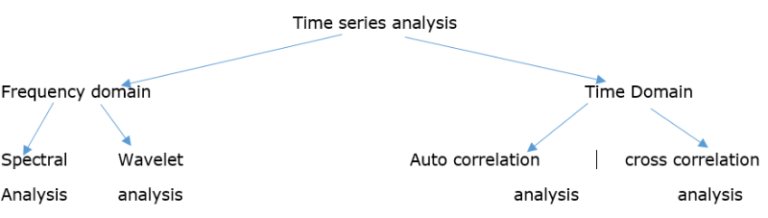

#### Técnicas utilizadas para el análisis de series de tiempo:

 1. Modelos ARMA, ARIMA
 2. Modelos multivariados caja-Jenkins.
 3. Holt inviernos suavización exponencial (simple, doble y triple)



## Suposiciones del modelo 
 1. Los datos deben ser estacionarios: por estacionarios significa que las propiedades de la serie no dependen del momento en que se capturan. Una serie de ruido blanco y series con comportamiento cíclico también pueden considerarse series estacionarias.
 2. Los datos deben ser univariados. ARIMA trabaja en una sola variable (La regresión automática tiene que ver con la regresión con los valores pasados).

## Pasos a seguir para el modelado ARIMA:

 1. Análisis exploratorio
 2. Encajar el modelo
 3. Medidas de diagnóstico.



## Importamos librerias necesarias importar data set, graficar y realizar la regresion

> En caso de no contar con la libreria "ggfortify" ejecutamos -> install.packages("ggfortify"). En el caso de la libreria "fUnitRoots" ejecutamos -> install.packages("fUnitRoots")

In [19]:
install.packages("fUnitRoots")
install.packages("ggfortify")
library(ggfortify)
library(fUnitRoots)
#Librerias para trabajar con predicciones con timesieres
library(tseries)
library(forecast)
library(lmtest)
library(MTS)


Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'”Warning message:
“package ‘fUnitRoots’ is not available (for R version 3.4.2)”Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'”Warning message:
“package ‘ggfortify’ is not available (for R version 3.4.2)”

ERROR: Error in library(ggfortify): there is no package called ‘ggfortify’


Importamos dataset directo del Storage del proyecto
--

In [2]:
library("aws.s3")
# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
Sys.setenv("AWS_ACCESS_KEY_ID" = "6ce4be664a4b48c2b3edaa8dd4873393", "AWS_SECRET_ACCESS_KEY" = "36853520c2dc8485afce48697e2a34dcb0e611ef68a056bd")
url <- "s3-api.us-geo.objectstorage.service.networklayer.com"
bucket <- "watsonday-donotdelete-pr-n7ldyiw6hna010"
headers <- list(`x-amz-content-sha256`="e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855")

obj <- s3HTTP(
    verb = "GET",
    bucket = bucket,
    headers = headers,
    path = "data_asset/ETC.csv_shaped_MTWM9YVaSVC4LamhDanTQQ.csv",
    key = Sys.getenv("AWS_ACCESS_KEY_ID"),
    secret = Sys.getenv("AWS_SECRET_ACCESS_KEY"),
    check_region = FALSE,
    base_url = url)
 
ETC <- read.csv(text = rawToChar(obj$content))
tail(ETC)


,COLUMN1,year,Minería,Extracción.de.petróleo.y.gas,Minería.de.minerales.metálicos.y.no.metálicos..excepto.petróleo.y.gas,Industrias.manufactureras,Industria.alimentaria,Industria.de.las.bebidas.y.el.tabaco,Fabricación.de.insumos.textiles.y.acabado.de.textiles,Fabricación.de.productos.textiles..excepto.prendas.de.vestir,⋯,Industria.del.plástico.y.del.hule,Fabricación.de.productos.a.base.de.minerales.no.metálicos,Industrias.metálicas.básicas,Fabricación.de.productos.metálicos,Fabricación.de.maquinaria.y.equipo,Fabricación.de.equipo.de.computación..comunicación..medición.y.de.otros.equipos..componentes.y.accesorios.electrónicos,Fabricación.de.accesorios..aparatos.eléctricos.y.equipo.de.generación.de.energía.eléctrica,Fabricación.de.equipo.de.transporte,Fabricación.de.muebles..colchones.y.persianas,Otras.industrias.manufactureras
43,42,2017-2,6623098,4977691,1645407,81772430,2230560,1321427,189838,120533,⋯,2226941,737534,2210107,1966318,4108815,15837776,5765398,36031418,567900,3831287
44,43,2017-3,8411303,6622858,1788445,86886088,2236706,1244923,178604,127493,⋯,2316454,716800,2316933,1975408,4037875,17748291,5950382,38825070,582959,3936291
45,44,2018,8431130,6285895,2145235,80382872,2314062,1265474,153677,109507,⋯,2208955,667406,2307942,1968402,3916698,13325448,5114120,38002308,511679,3704160
46,45,2018-1,8935409,6736752,2198657,88314182,2391188,1524808,176003,123145,⋯,2500713,818093,2517959,2177809,4598703,15709991,5919561,39769993,577575,4122292
47,46,2018-2,9193234,7183695,2009539,89835492,2256312,1468354,185349,135501,⋯,2405624,800814,2497032,2244026,4393381,16393748,5945402,41389435,585935,4116141
48,47,2018-3,8257426,6276450,1980976,94093045,2282875,1383639,186249,119840,⋯,2479894,790936,2292729,2229524,4497300,19085176,6310094,42536869,620220,4231770


Parseamos nuestos datos a series  de tiempo 
----
### El primer paso en el modelado de series de tiempo  es convertir los datos disponibles al formato de datos de series de tiempo. Graficamos la serie de tiempo para determinar visualmente si el conjunto de datos posiblemente tenga una media y una variación constantes.


In [5]:
serie.list <- lapply(ETC, function(x)
    ts(x,frequency=4,start=c(2007,1),end=c(2018,4),names(ETC)))
serie.list

$COLUMN1
     Qtr1 Qtr2 Qtr3 Qtr4
2007    0    1    2    3
2008    4    5    6    7
2009    8    9   10   11
2010   12   13   14   15
2011   16   17   18   19
2012   20   21   22   23
2013   24   25   26   27
2014   28   29   30   31
2015   32   33   34   35
2016   36   37   38   39
2017   40   41   42   43
2018   44   45   46   47

$year
     Qtr1 Qtr2 Qtr3 Qtr4
2007    1    2    3    4
2008    5    6    7    8
2009    9   10   11   12
2010   13   14   15   16
2011   17   18   19   20
2012   21   22   23   24
2013   25   26   27   28
2014   29   30   31   32
2015   33   34   35   36
2016   37   38   39   40
2017   41   42   43   44
2018   45   46   47   48

$Minería
         Qtr1     Qtr2     Qtr3     Qtr4
2007  7938380  9535232 10765470 12185741
2008 12033089 13685693 12870601  6248271
2009  4934089  6712813  7540111  8660669
2010  8735619  9363811  9512155 11771366
2011 12780665 14268939 13623189 14554502
2012 14157618 12807669 13233306 13328534
2013 12438462 11562394 12247324 11709

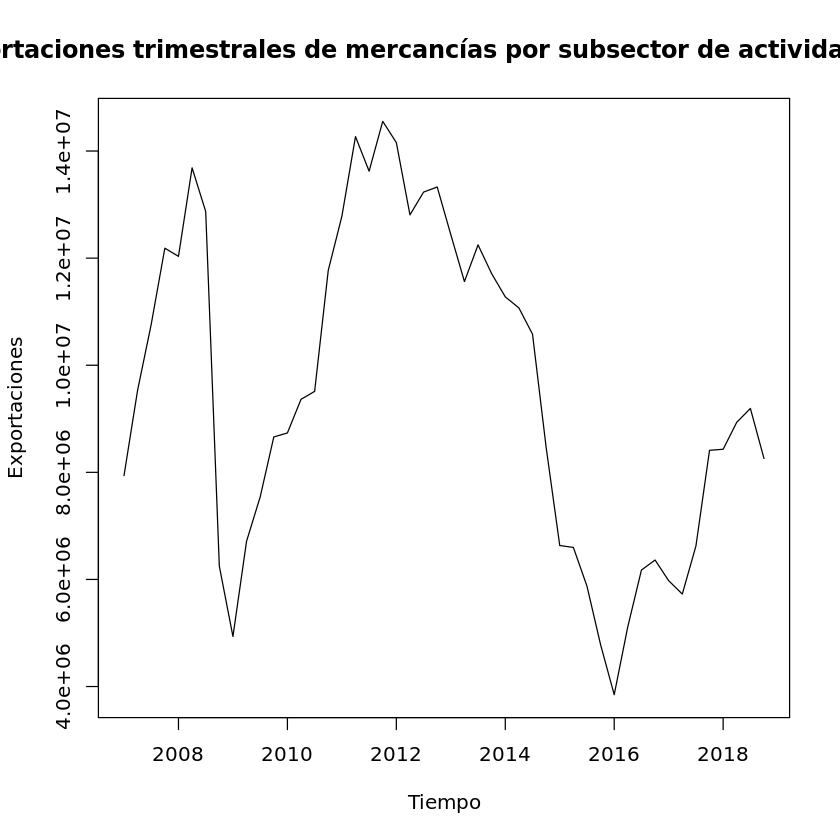

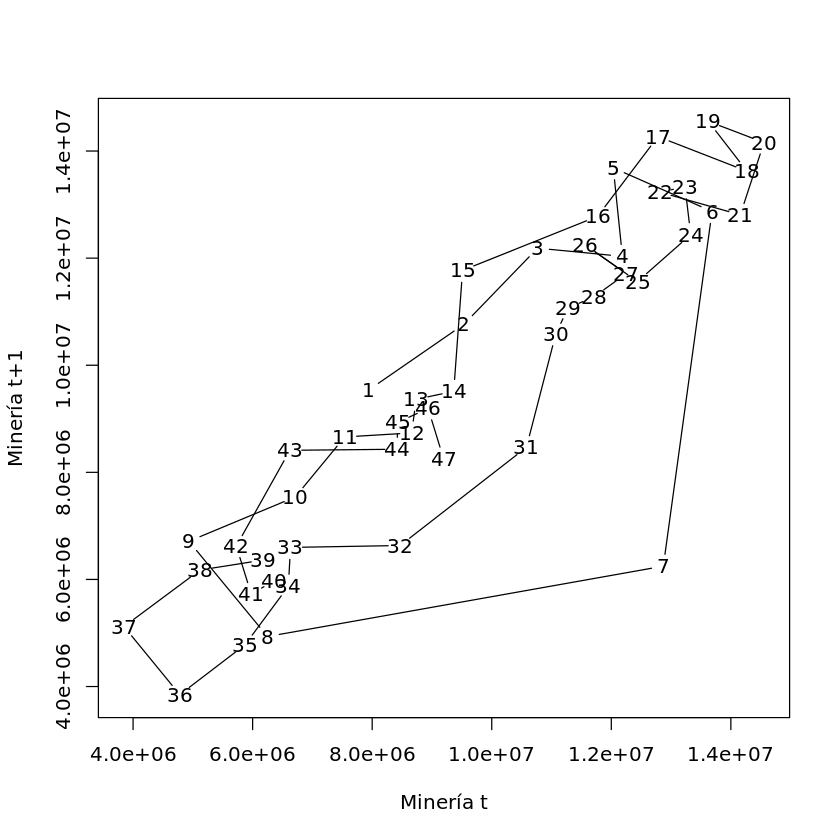

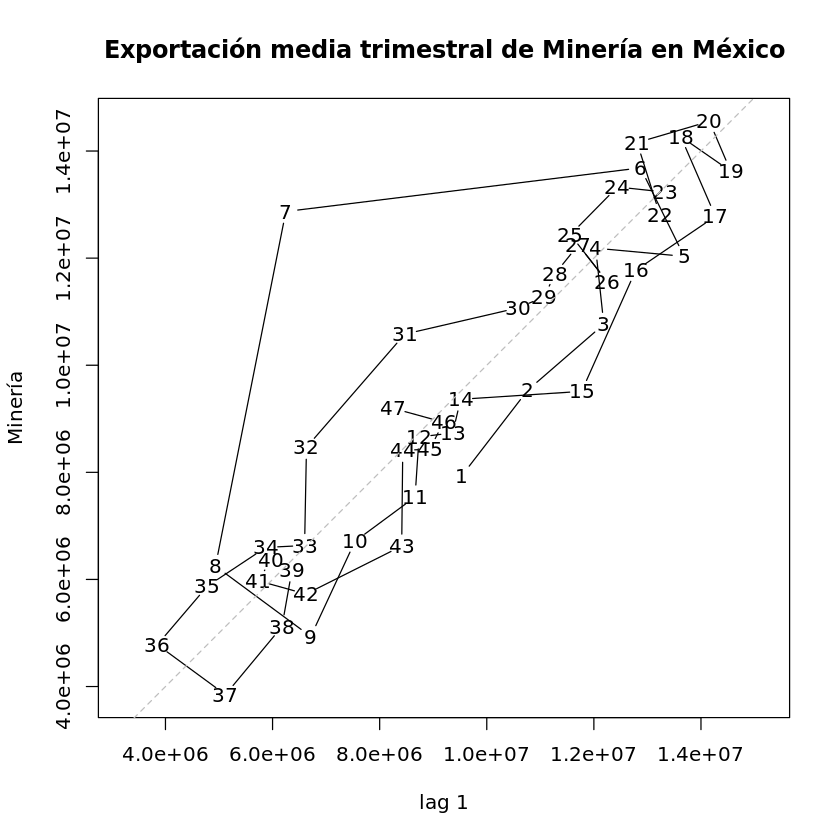

In [17]:
serie1 <- ts(ETC['Minería'],frequency=4,start=c(2007,1))
#par(mfrow=c(1,2))
plot(serie1, xlab = "Tiempo", ylab = "Exportaciones",main="Exportaciones trimestrales de mercancías por subsector de actividad SCIAN")
plot(serie1,lag(serie1),xlab="Minería t",ylab="Minería t+1")
lag.plot(serie1, main="Exportación media trimestral de Minería en México")

## Análisis exploratorio
 1. Análisis de autocorrelación para examinar la dependencia en serie: se utiliza para estimar qué valor en el pasado tiene una correlación con el valor actual. Proporciona la estimación p, d, q para los modelos ARIMA.
 2. Análisis espectral para examinar el comportamiento cíclico: realizado para describir cómo la variación en una serie de tiempo puede ser explicada por componentes cíclicos. También se conoce como un análisis de dominio de frecuencia. Usando esto, los componentes periódicos en un ambiente ruidoso se pueden separar.
 3. Estimación y descomposición de la tendencia: se utiliza para el ajuste estacional. Busca construir, a partir de una serie temporal observada, una serie de componentes (que podrían usarse para reconstruir la serie original) donde cada una de ellas tiene una característica determinada.

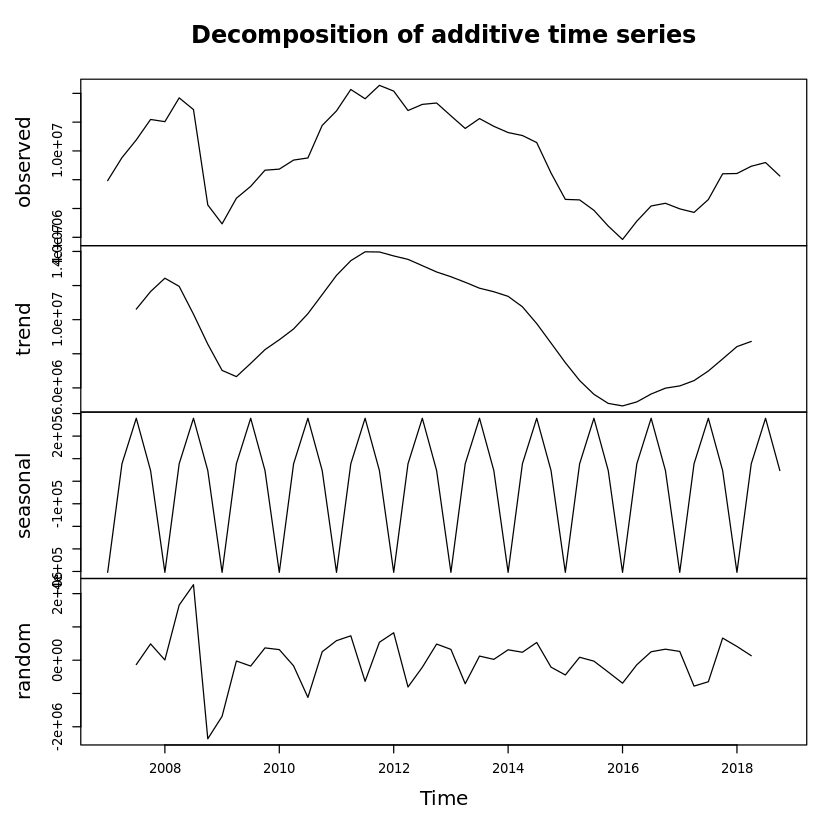

In [45]:
components.ts = decompose(serie1)
plot(components.ts)

>Aquí obtenemos 4 componentes:
* Observado - la trama de datos reales
* Tendencia: el movimiento general hacia arriba o hacia abajo de los puntos de datos
* Estacional: cualquier patrón mensual / anual de los puntos de datos
* Aleatorio - parte inexplicable de los datos.

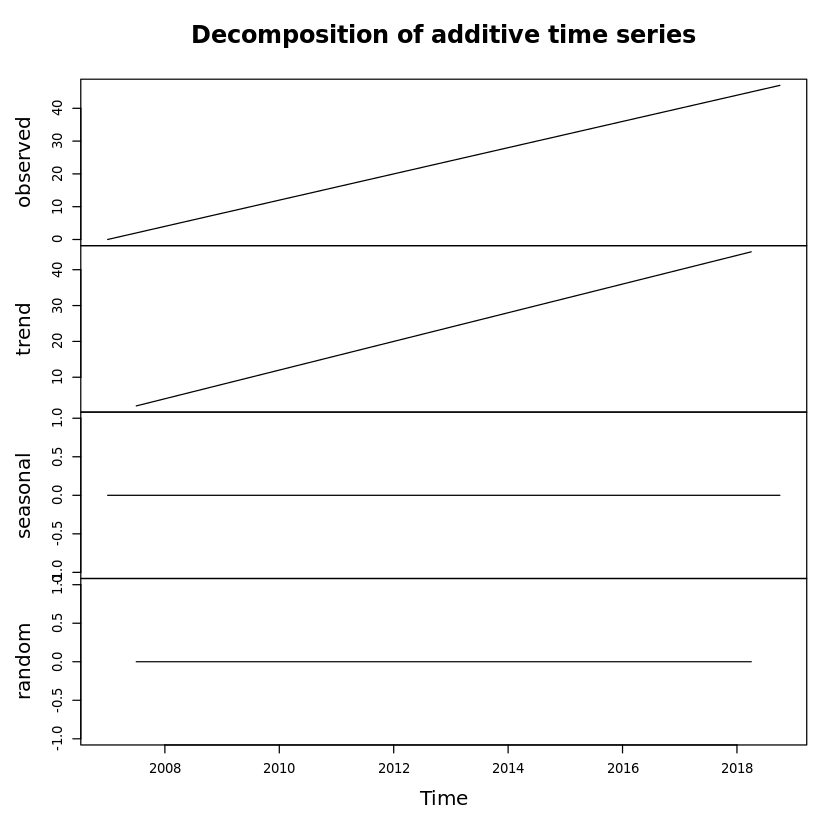

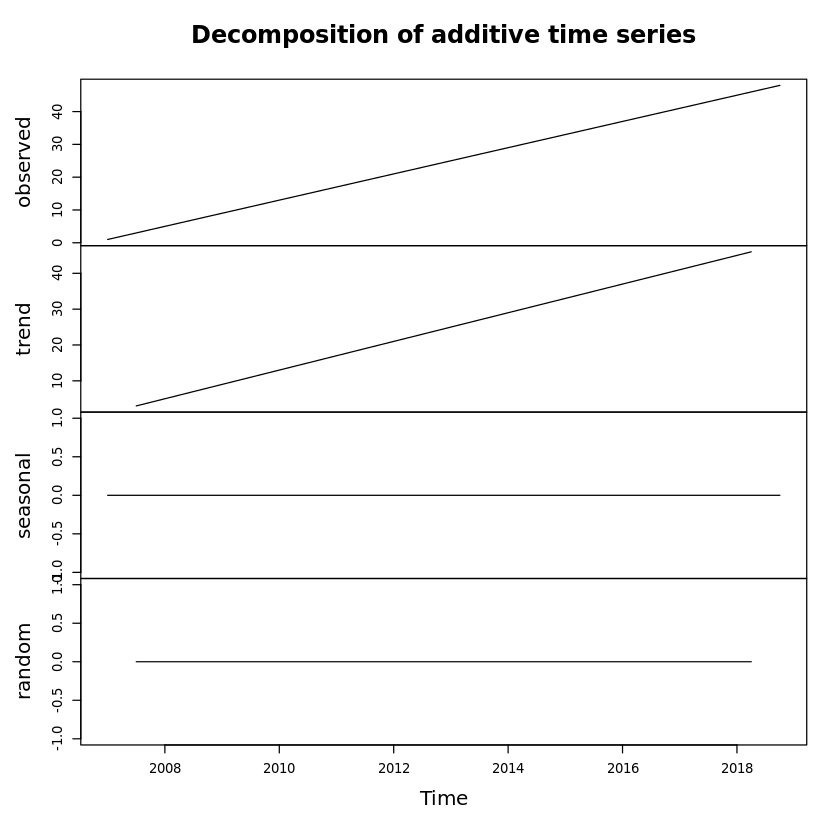

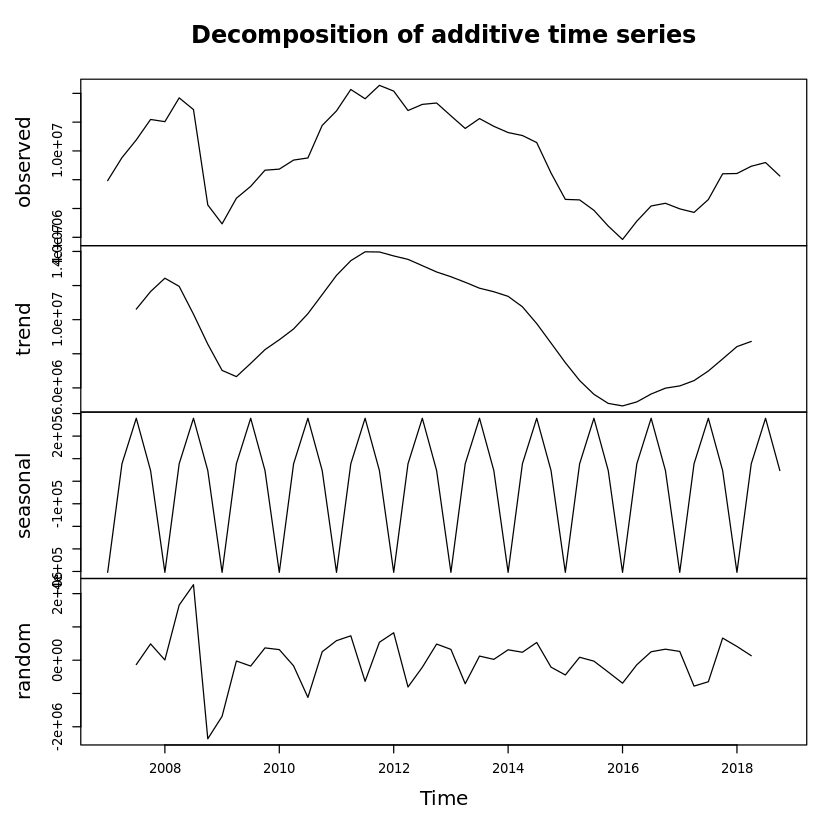

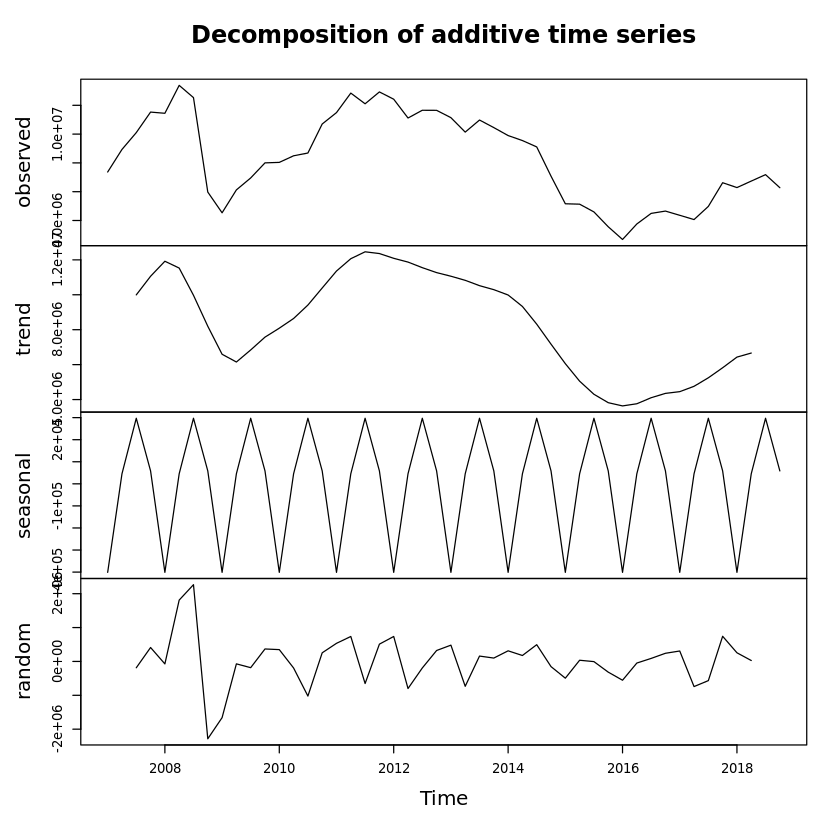

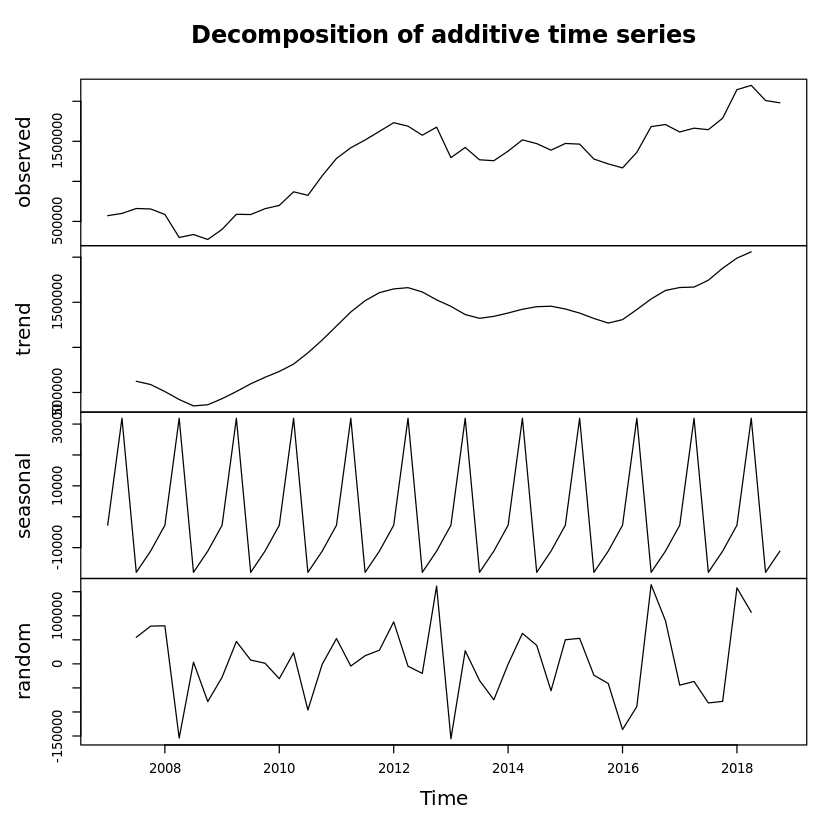

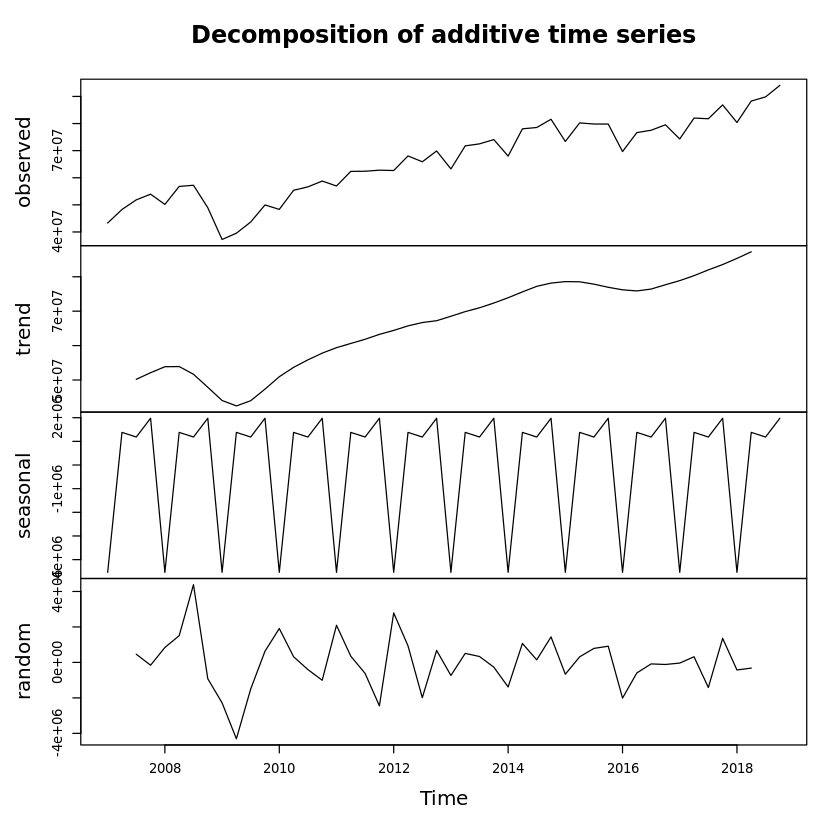

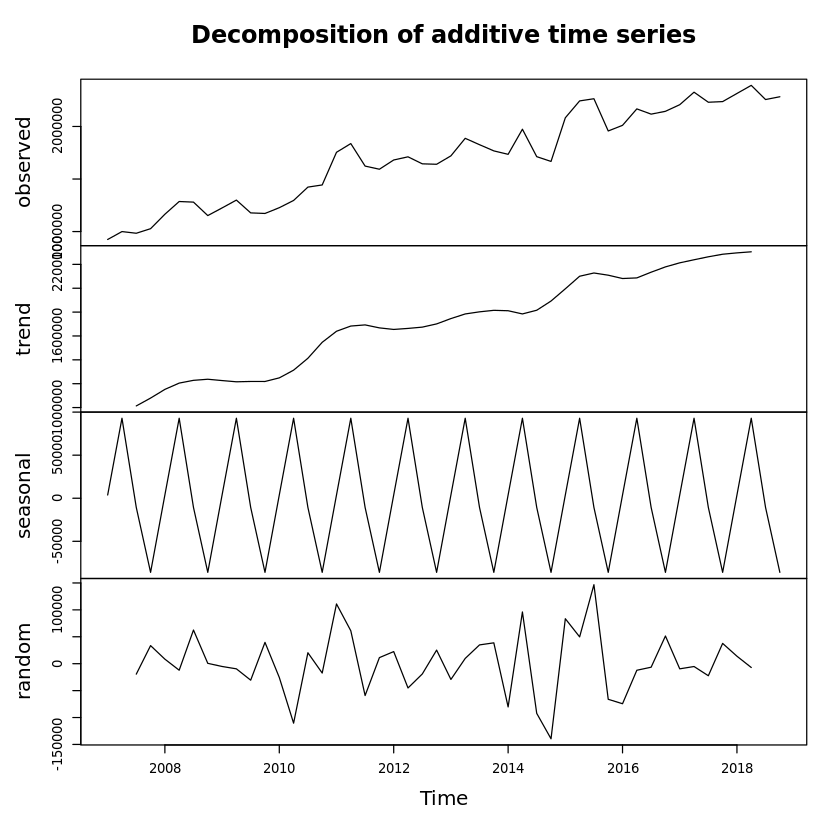

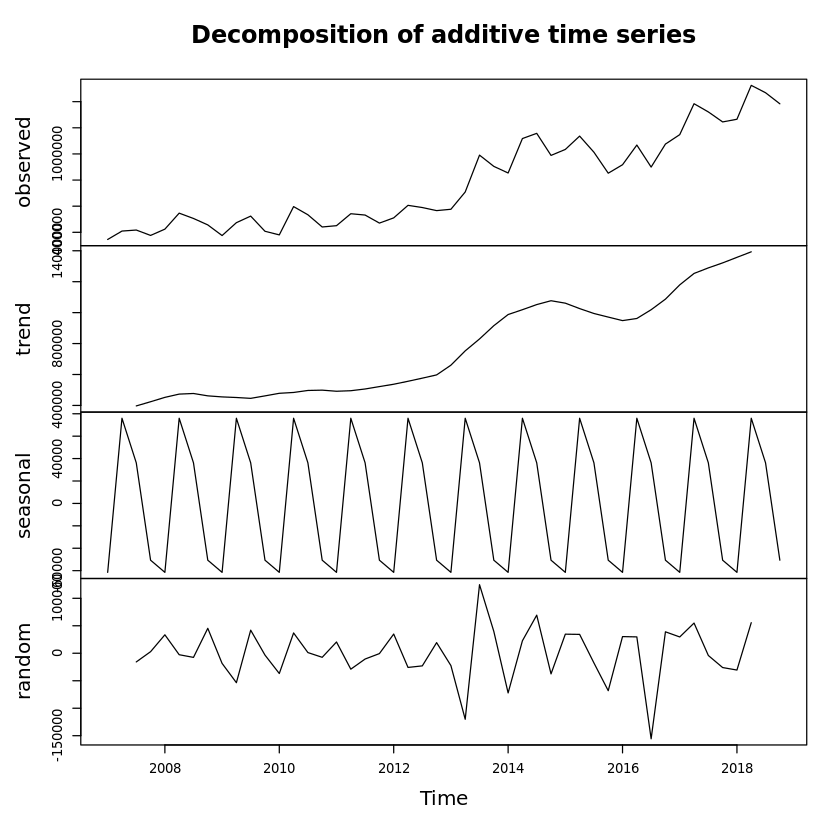

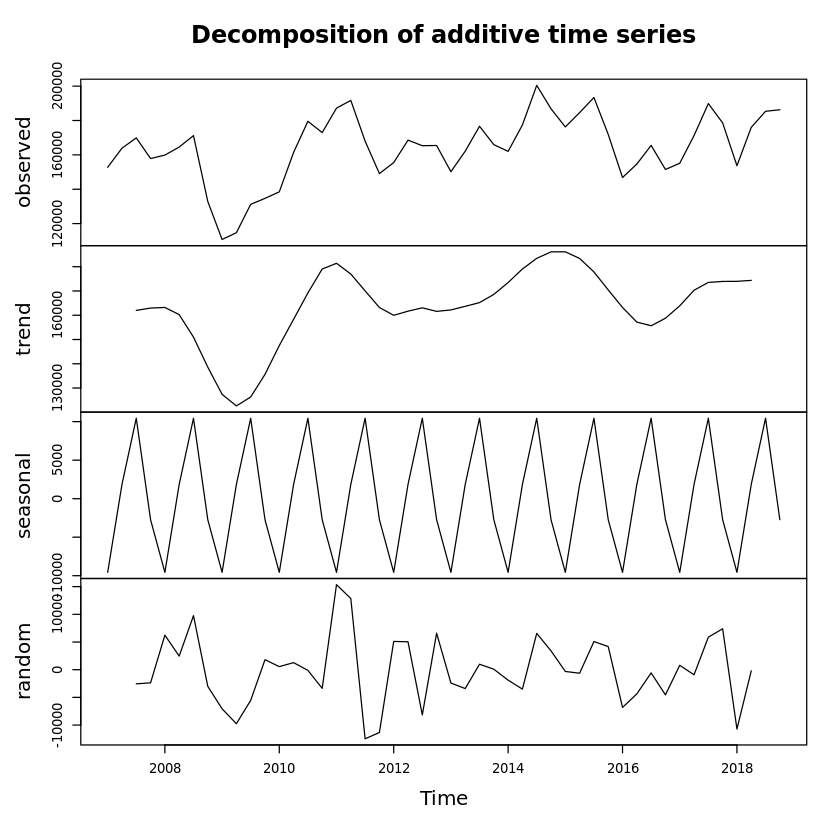

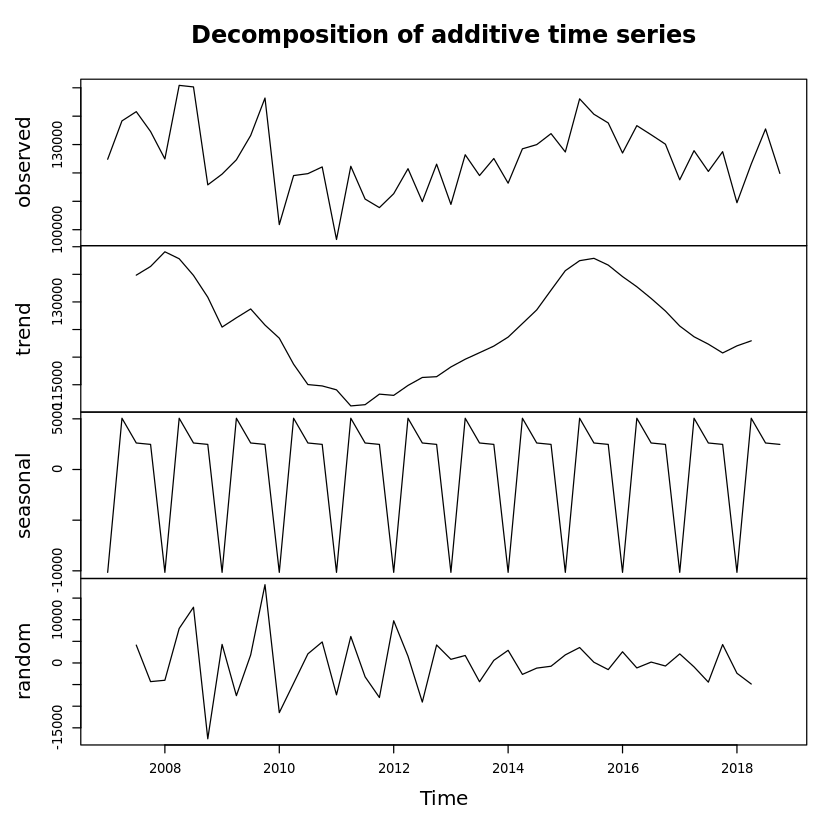

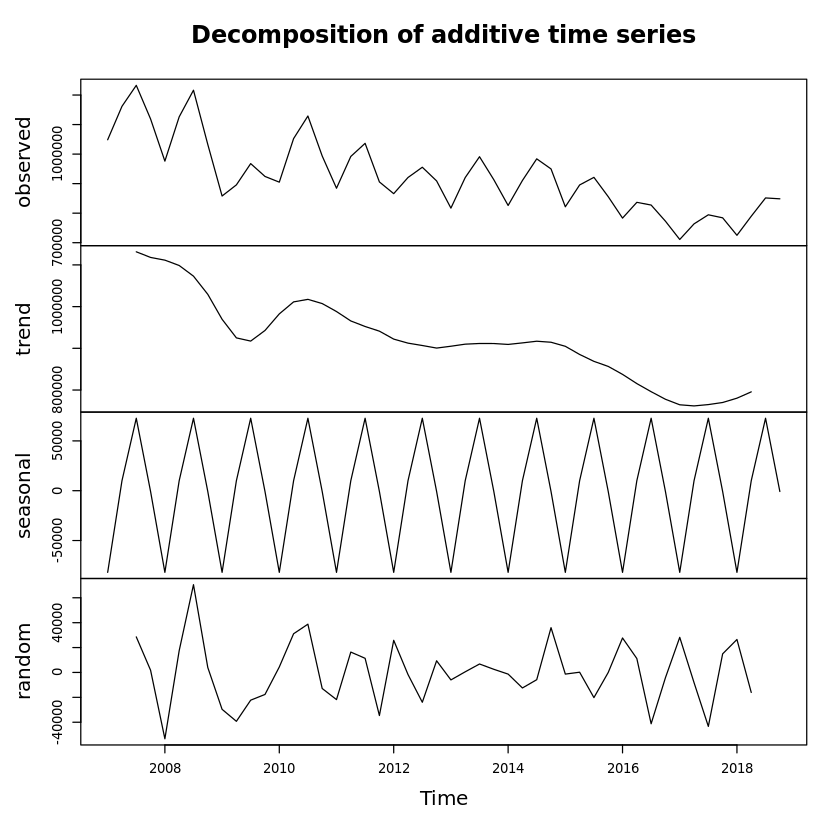

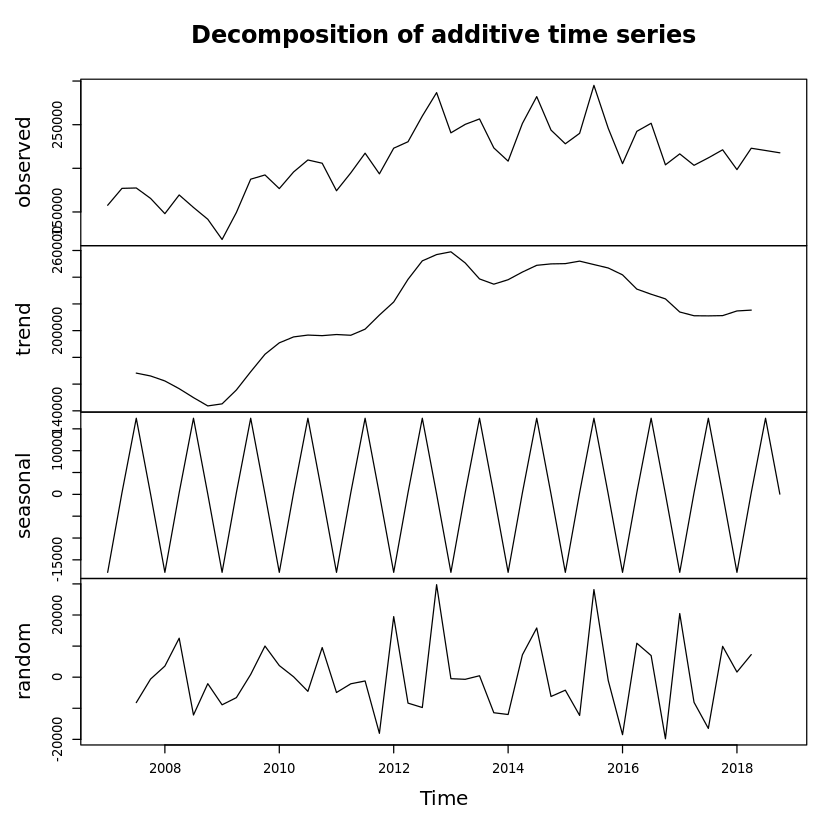

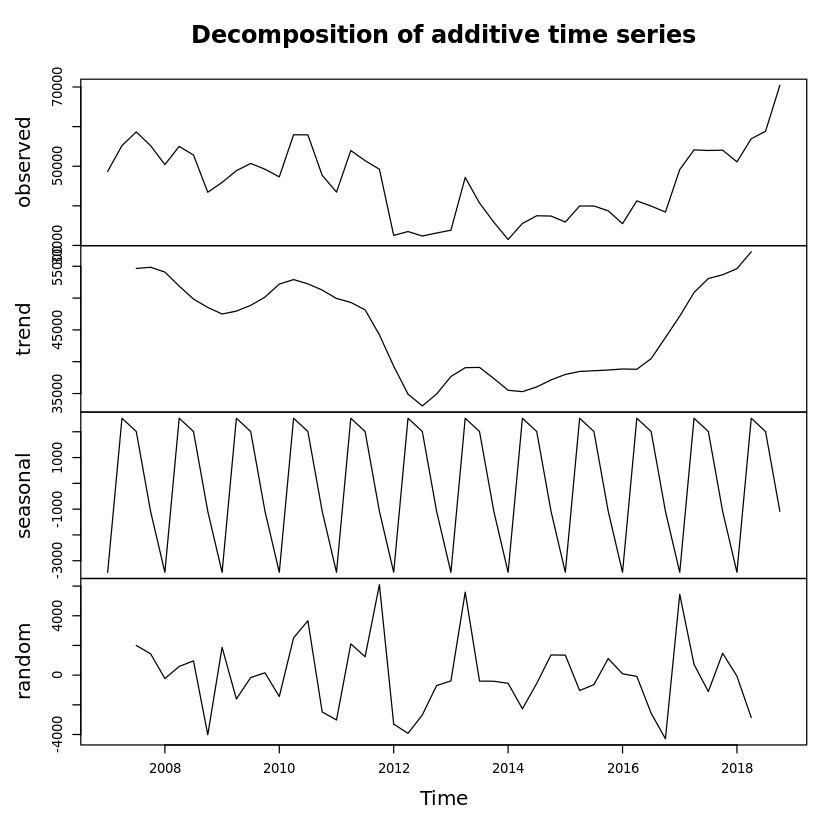

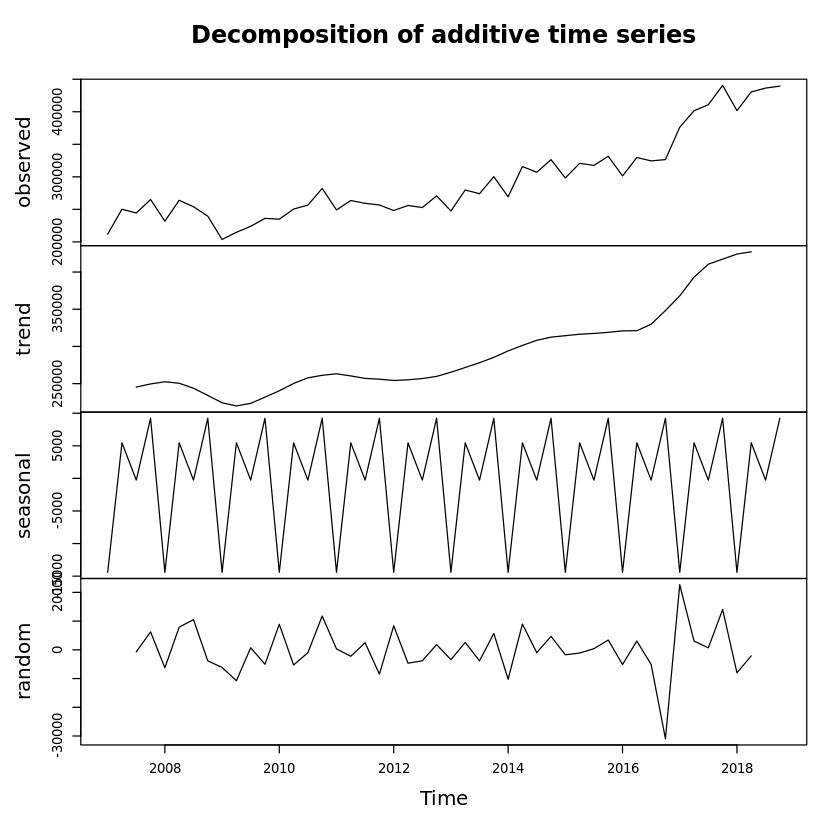

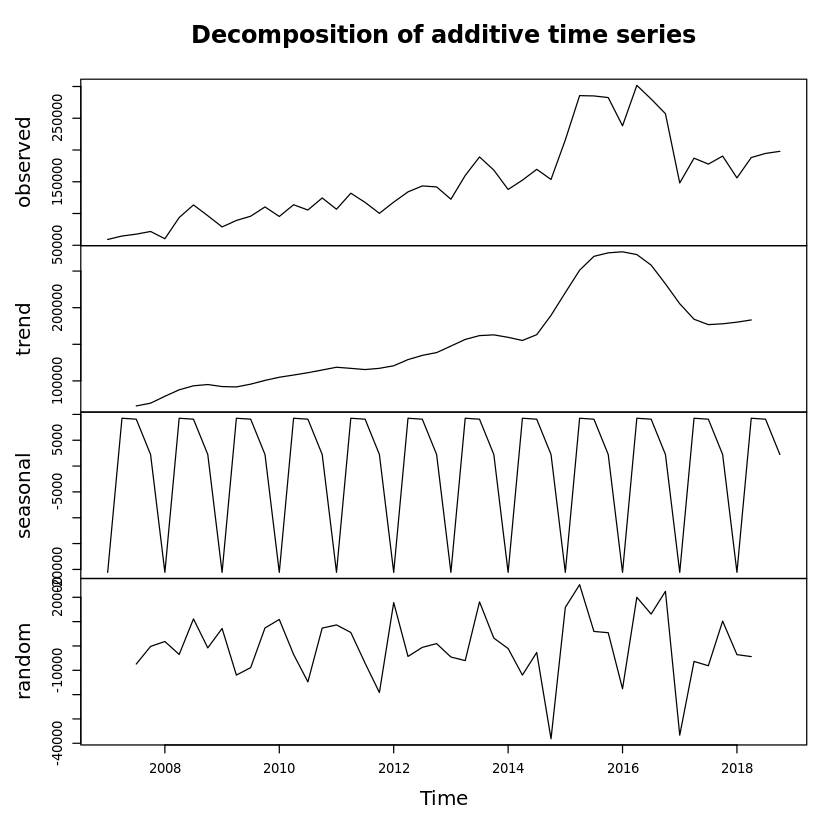

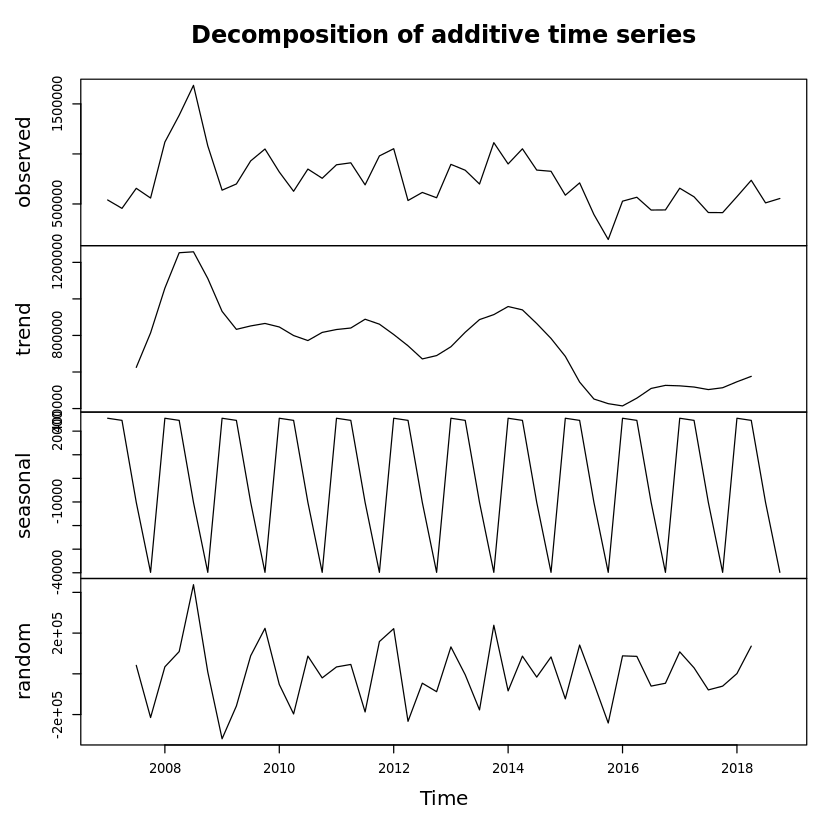

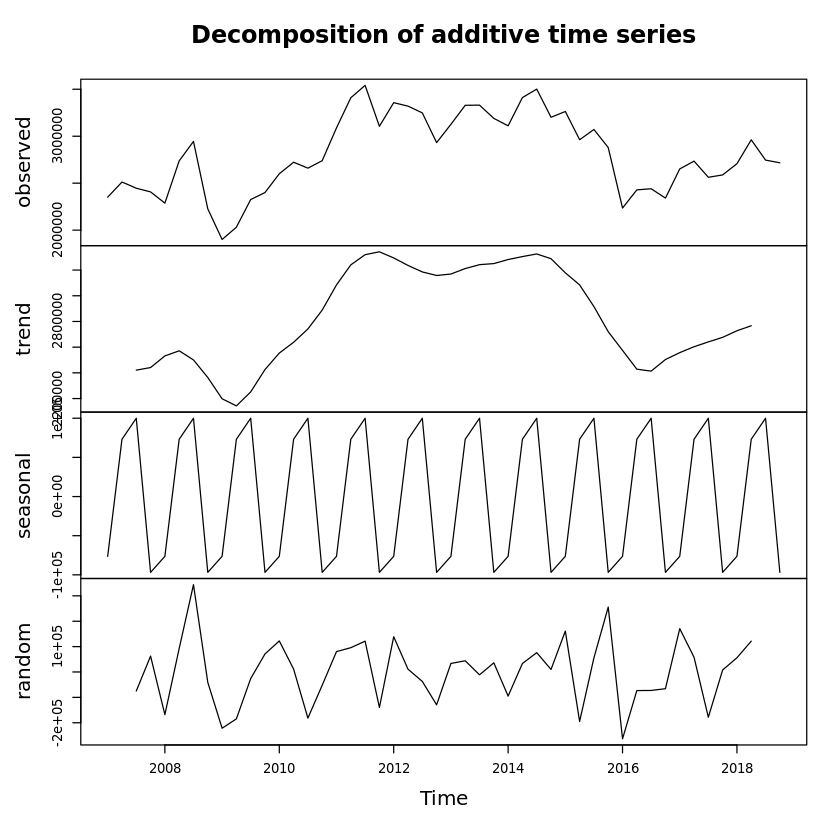

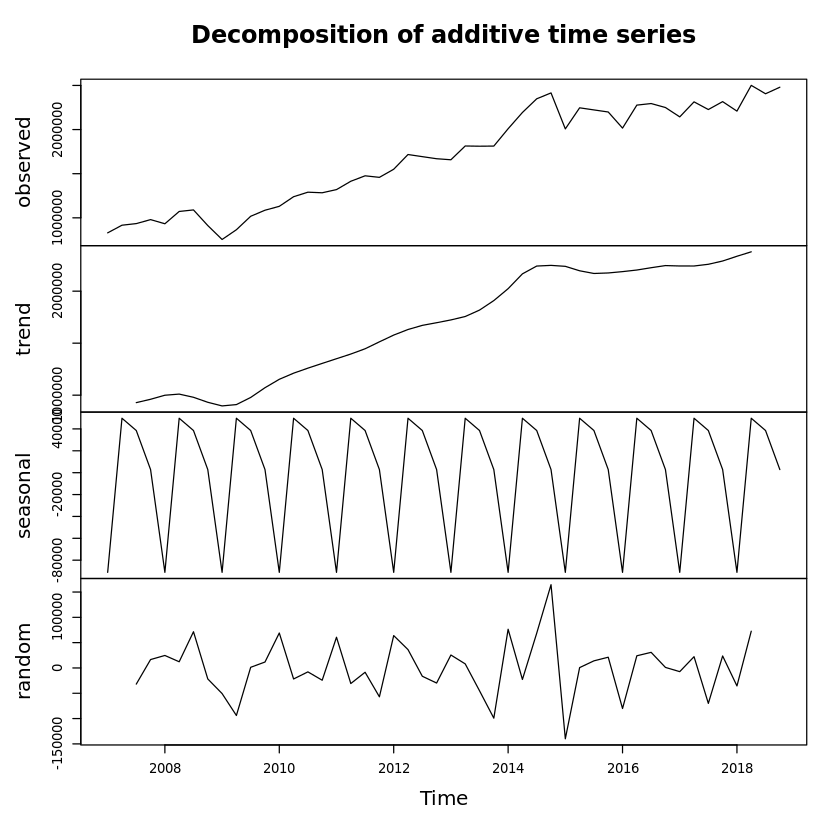

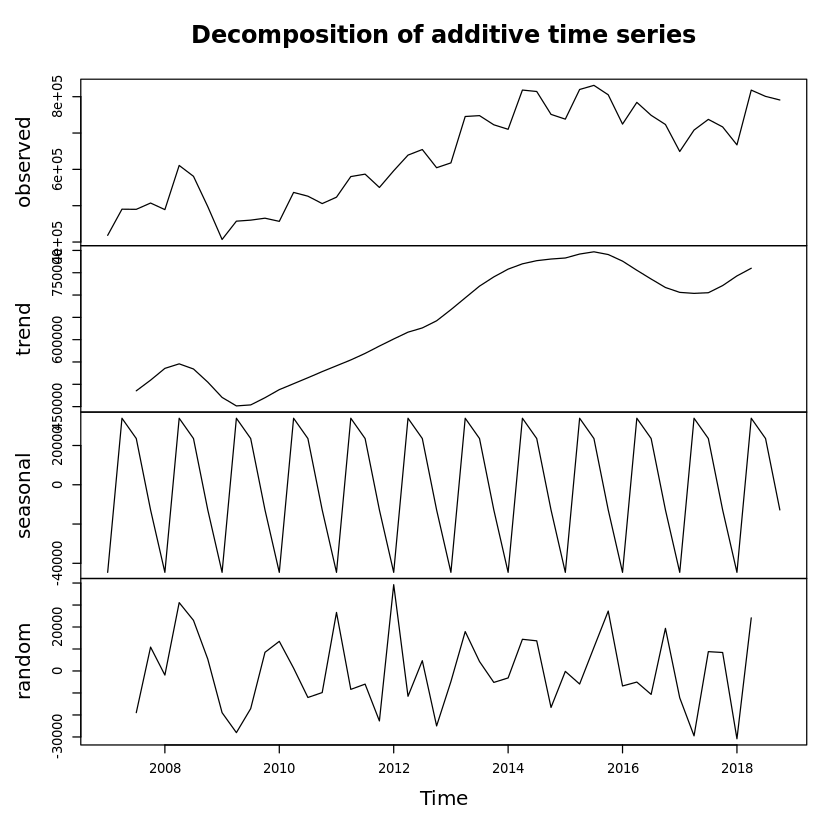

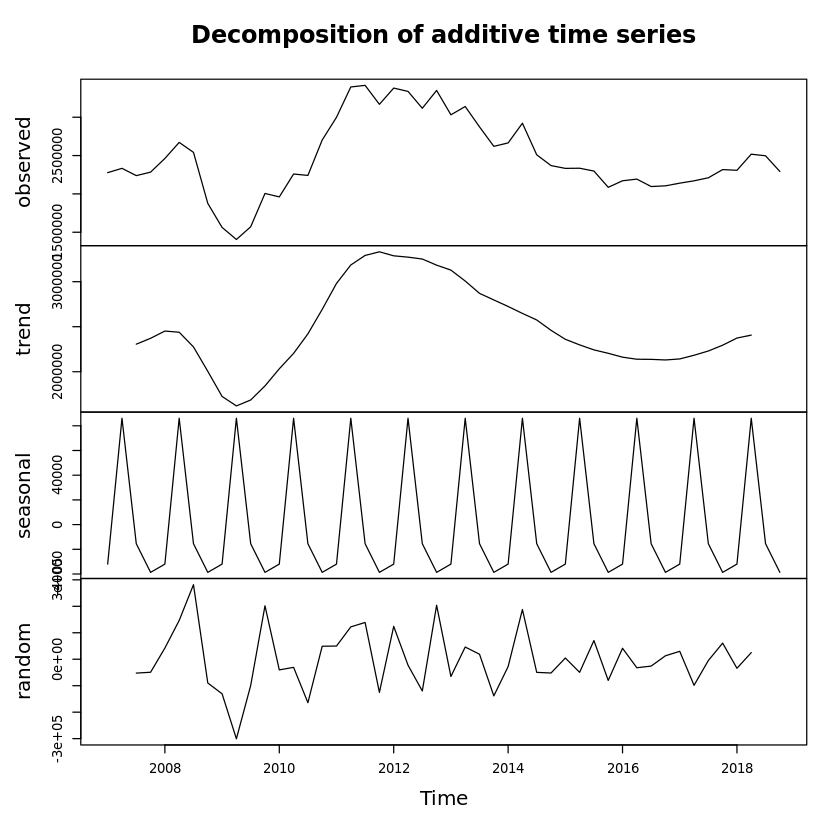

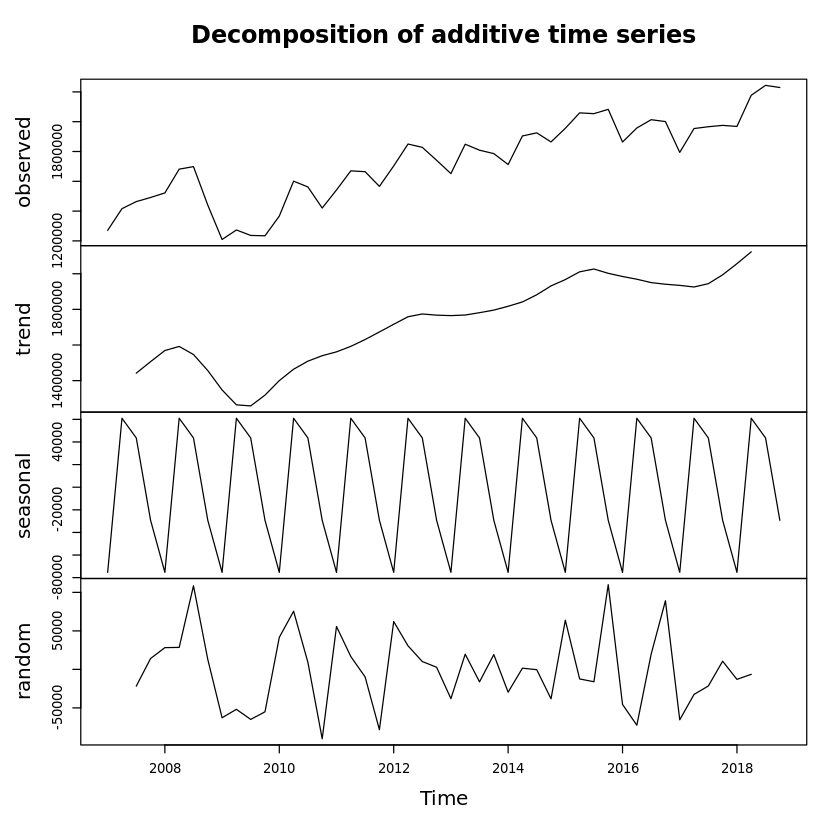

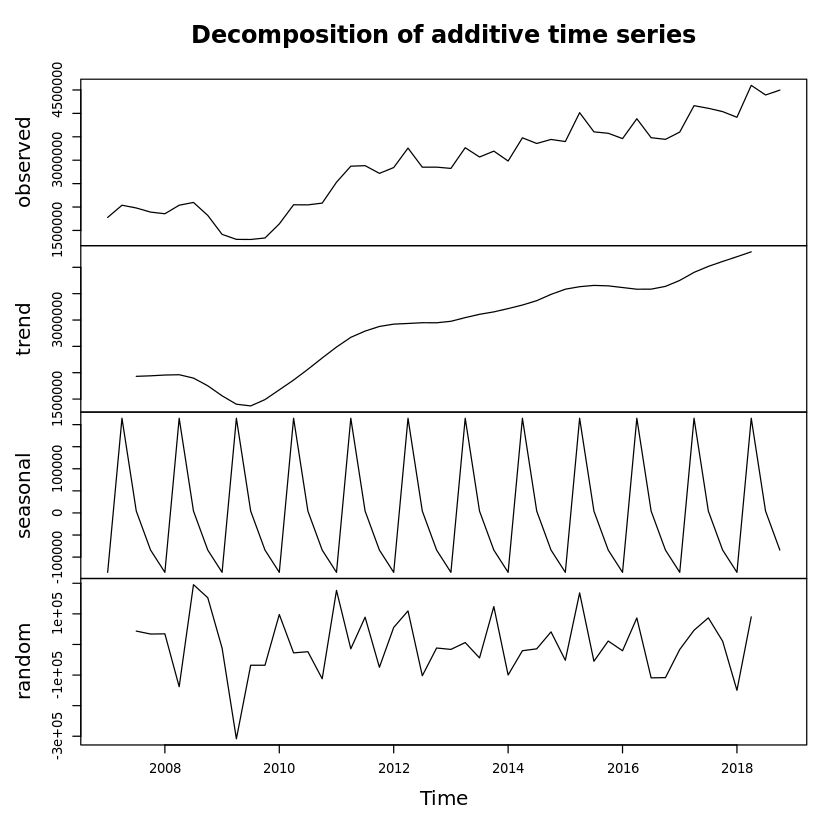

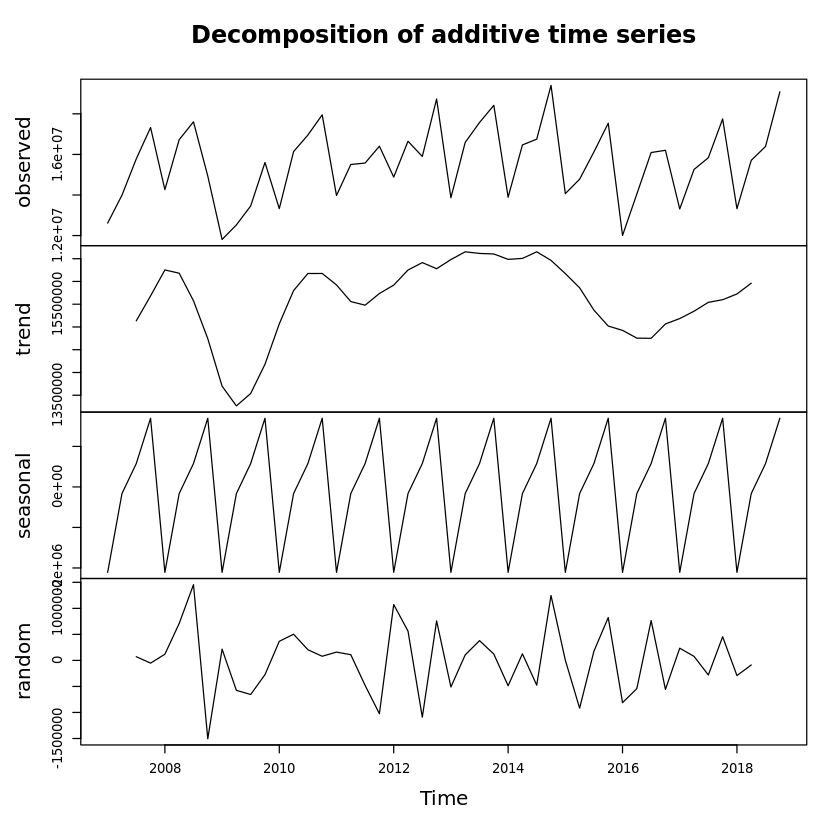

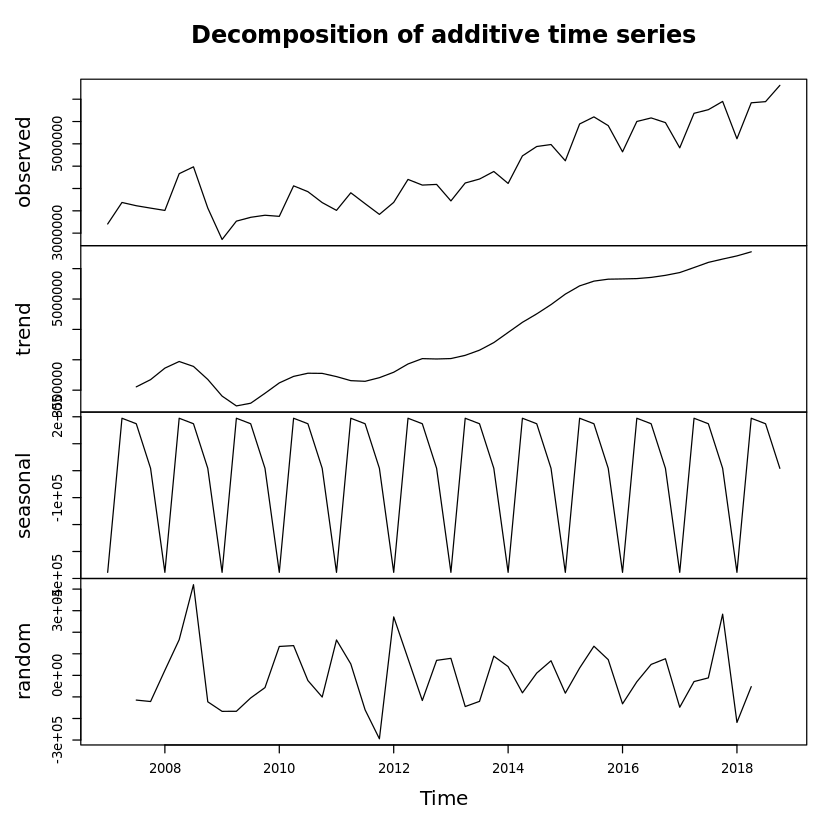

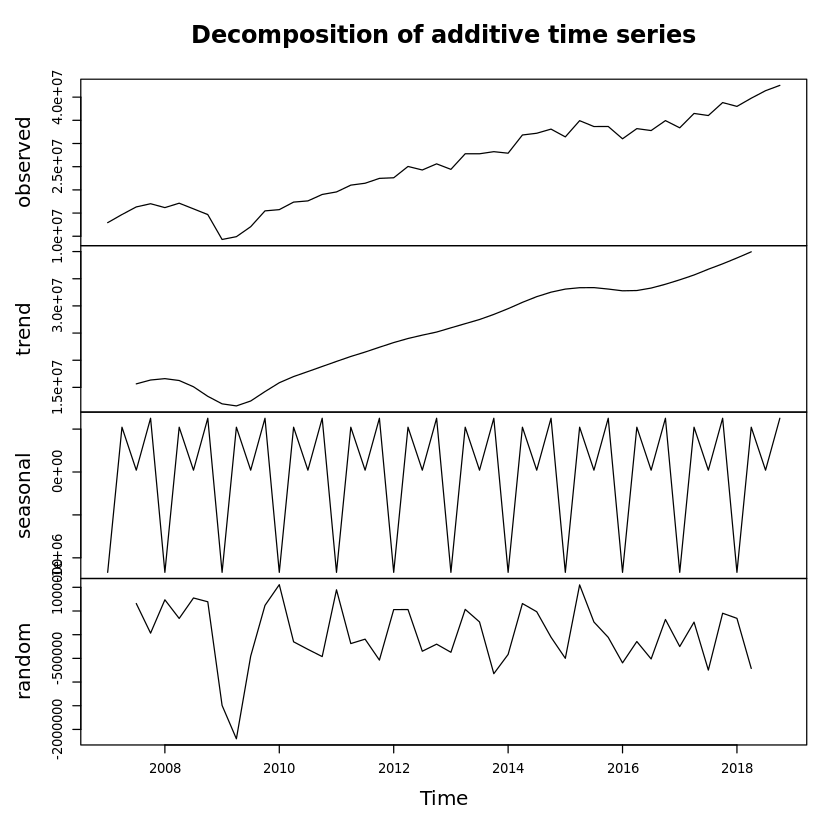

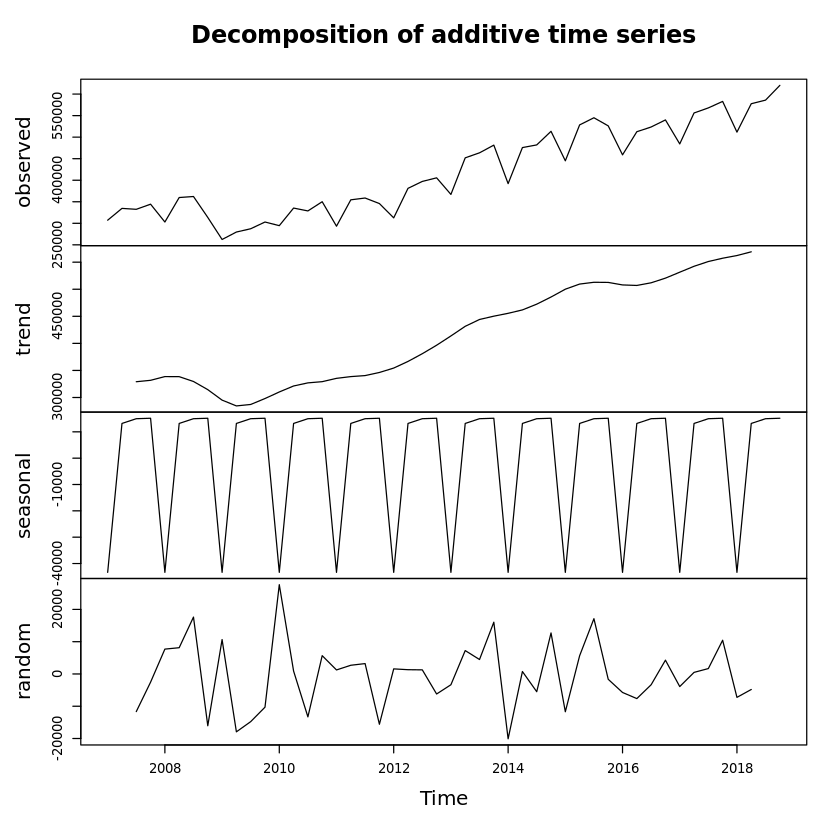

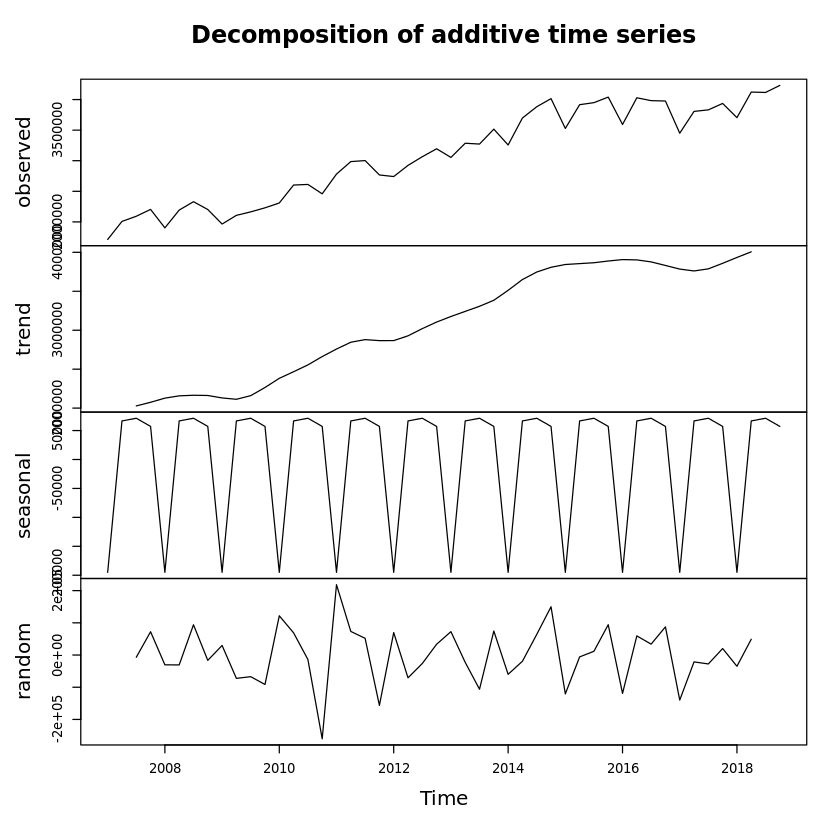

In [10]:
for (x in 1:length(serie.list)){ 
    components.ts = decompose(serie.list[[x]])
    plot(components.ts)
    
}

In [ ]:
# urkpssTest(serie1, type = c("tau"), lags = c("short"),use.lag = NULL, doplot = TRUE)
tsstationary = diff(serie1, differences=1)
plot(tsstationary)

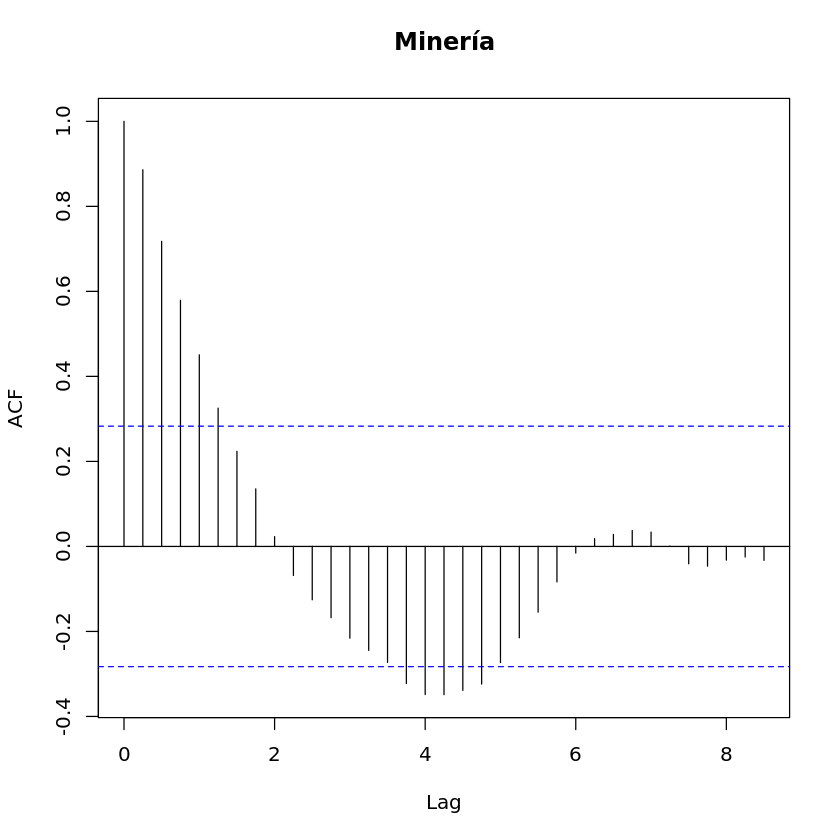

In [35]:
acf(serie1,lag.max=34) 

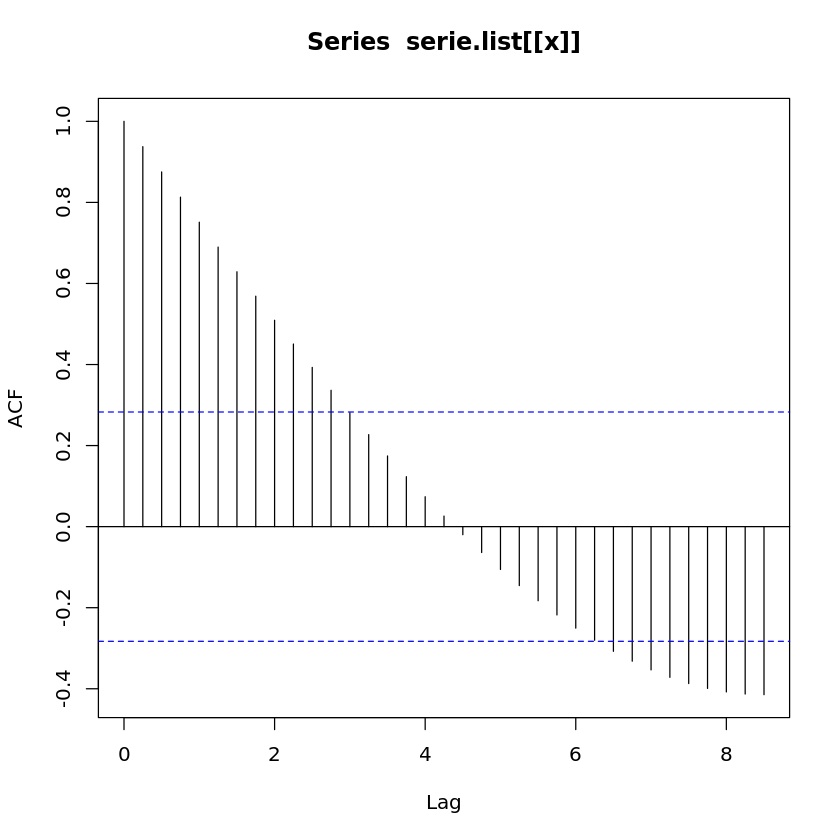

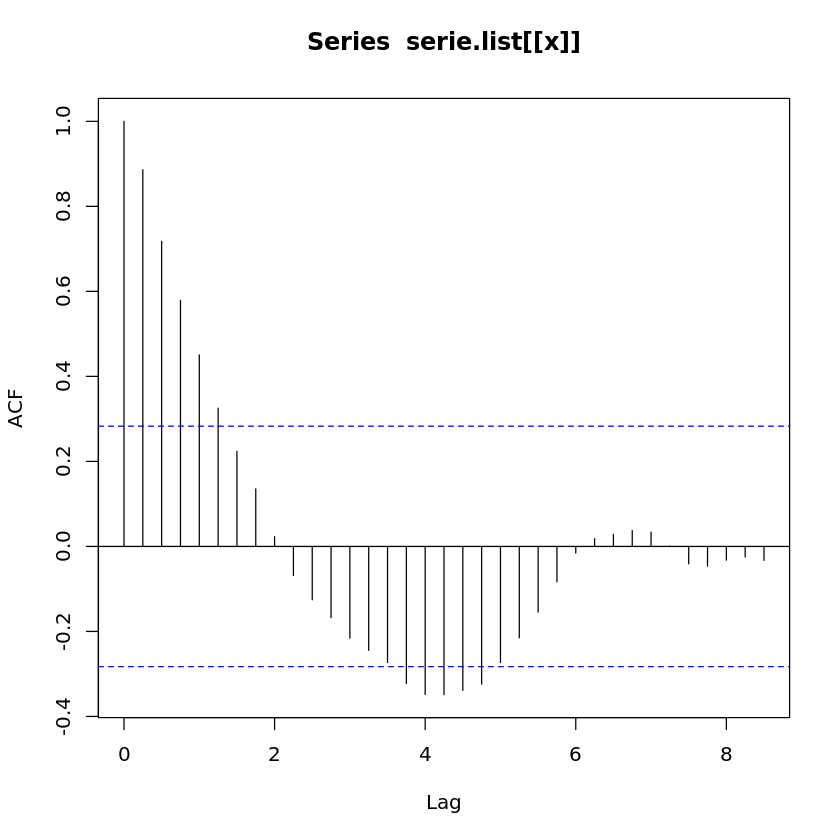

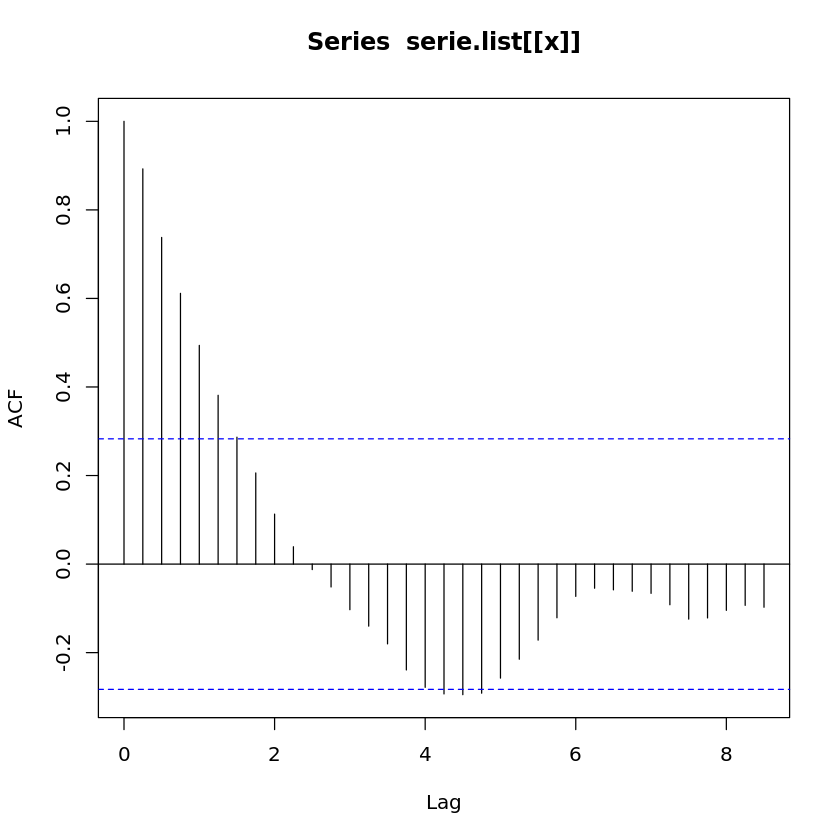

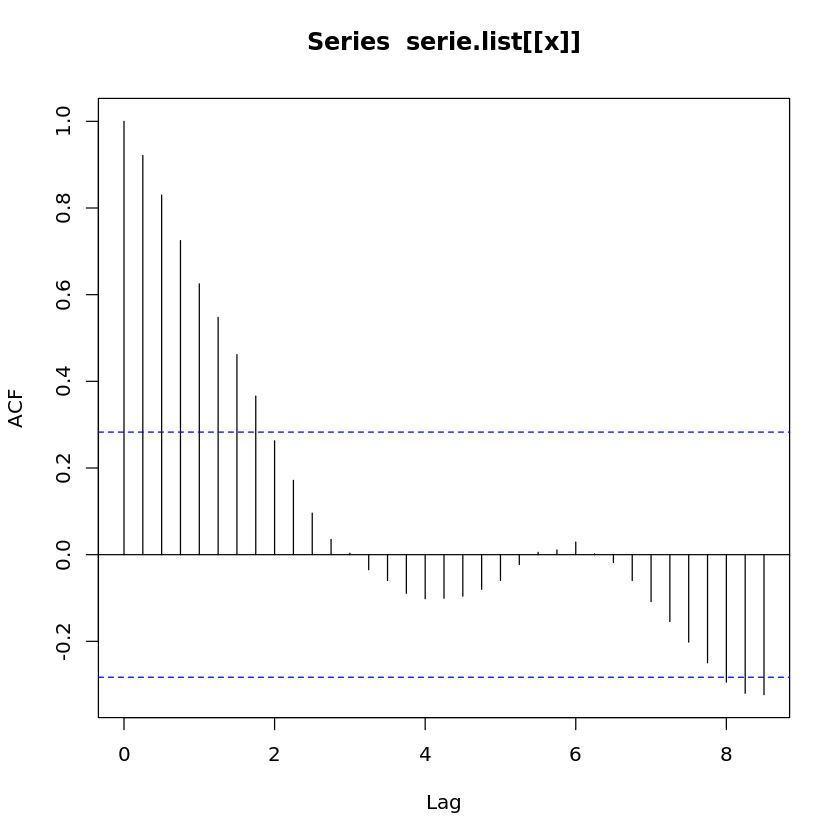

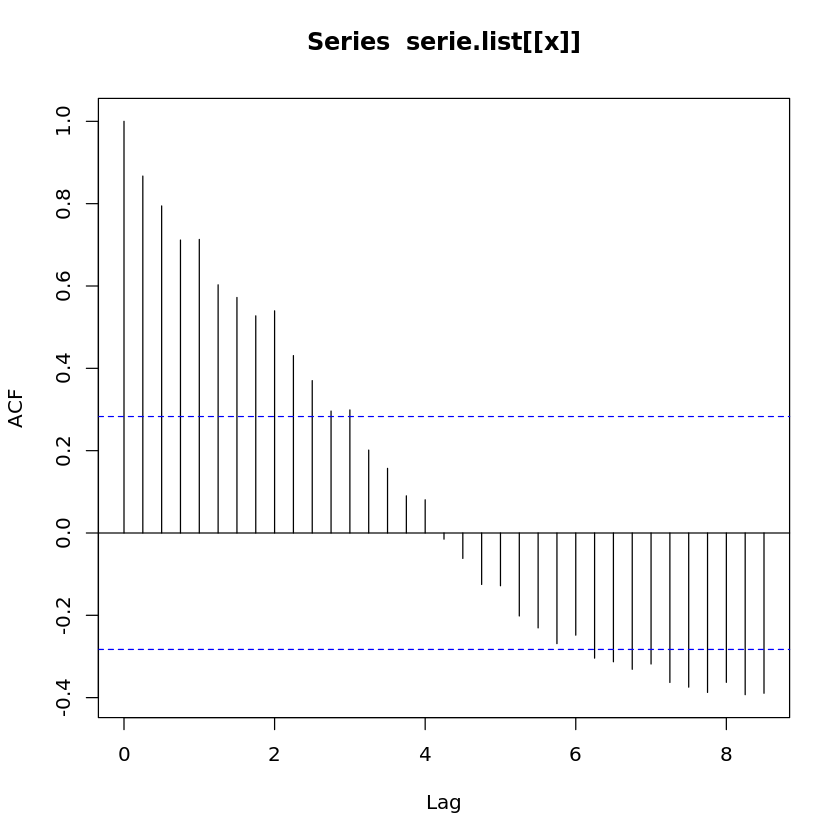

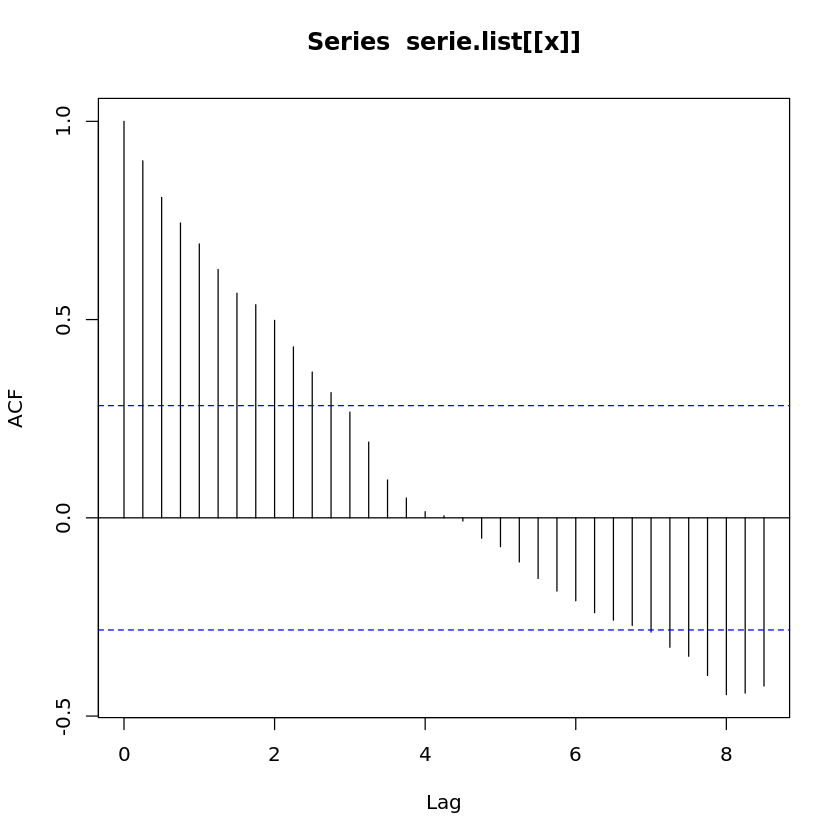

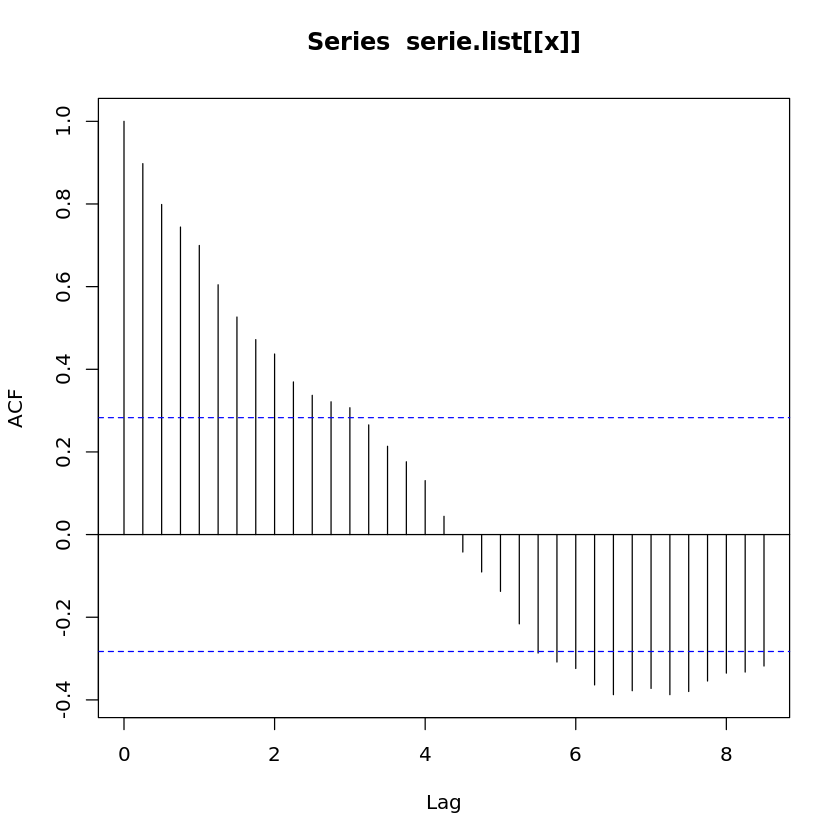

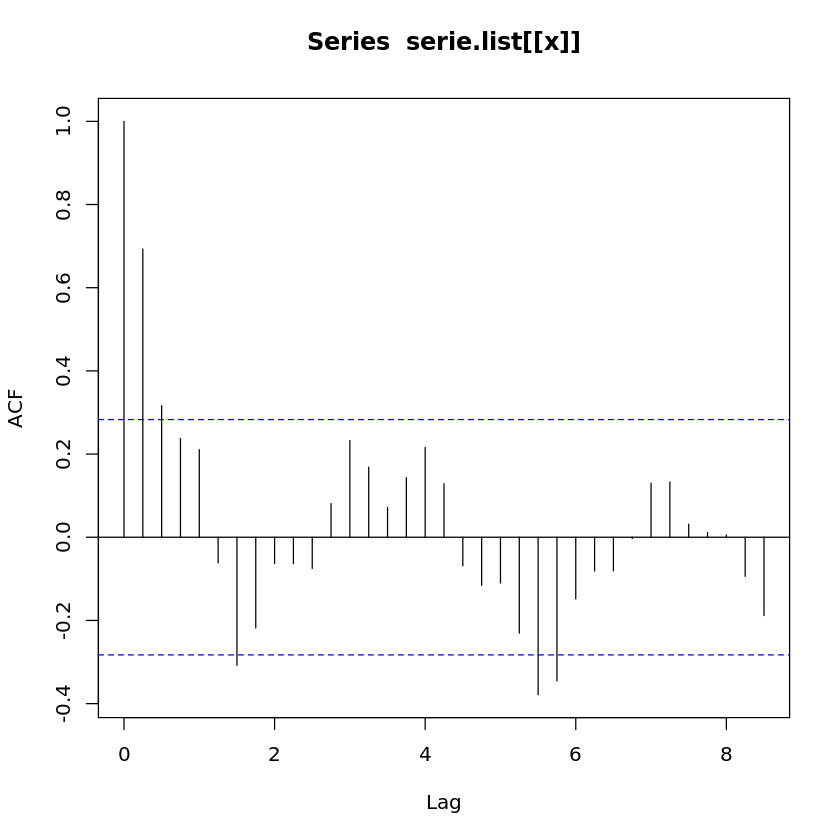

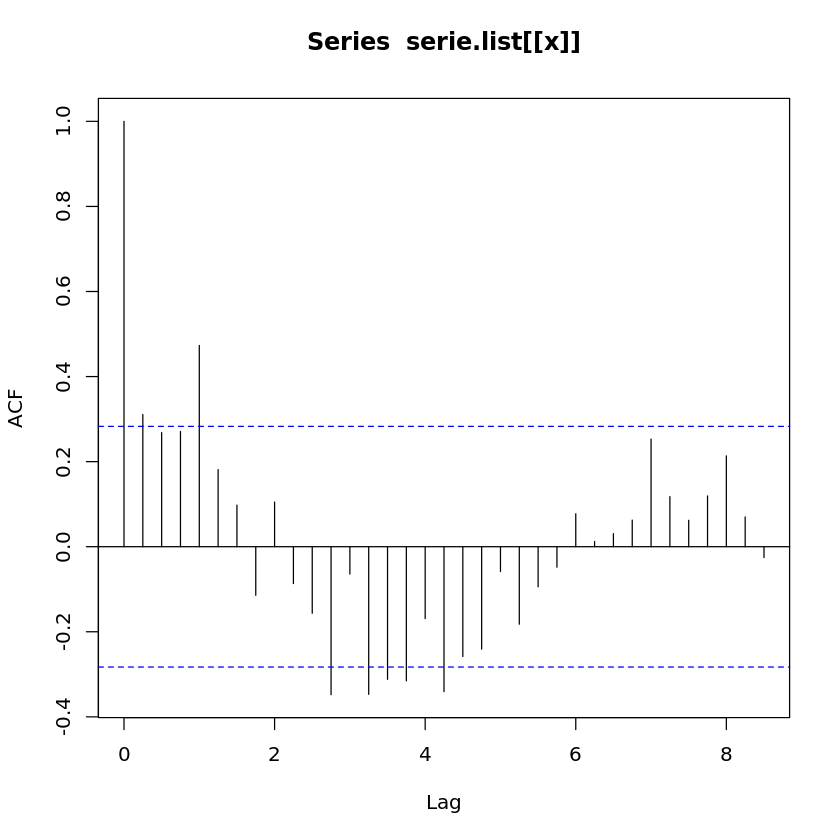

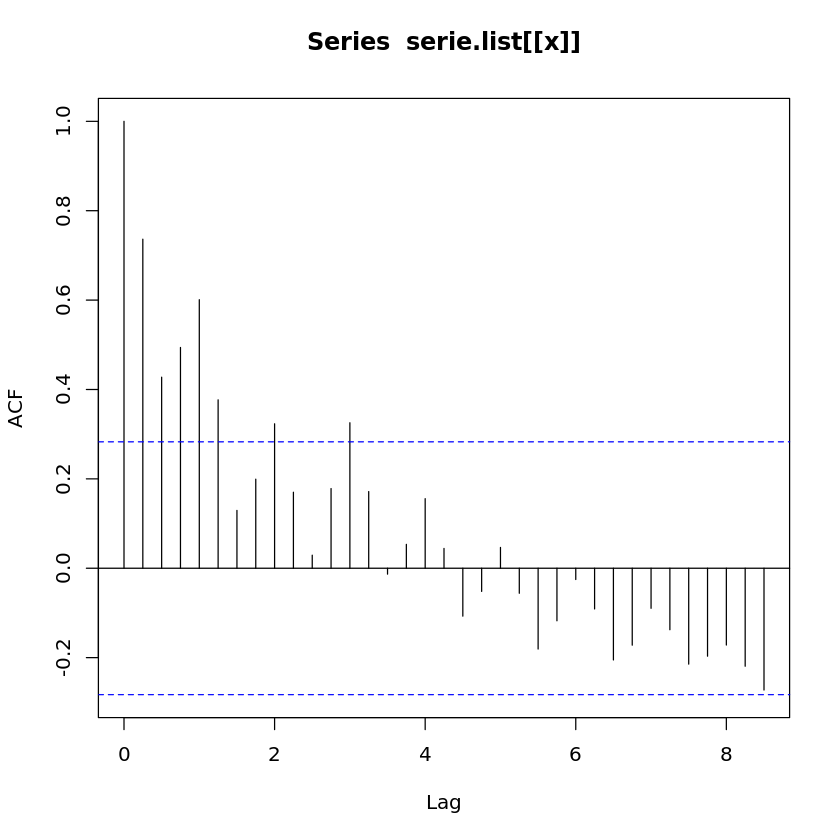

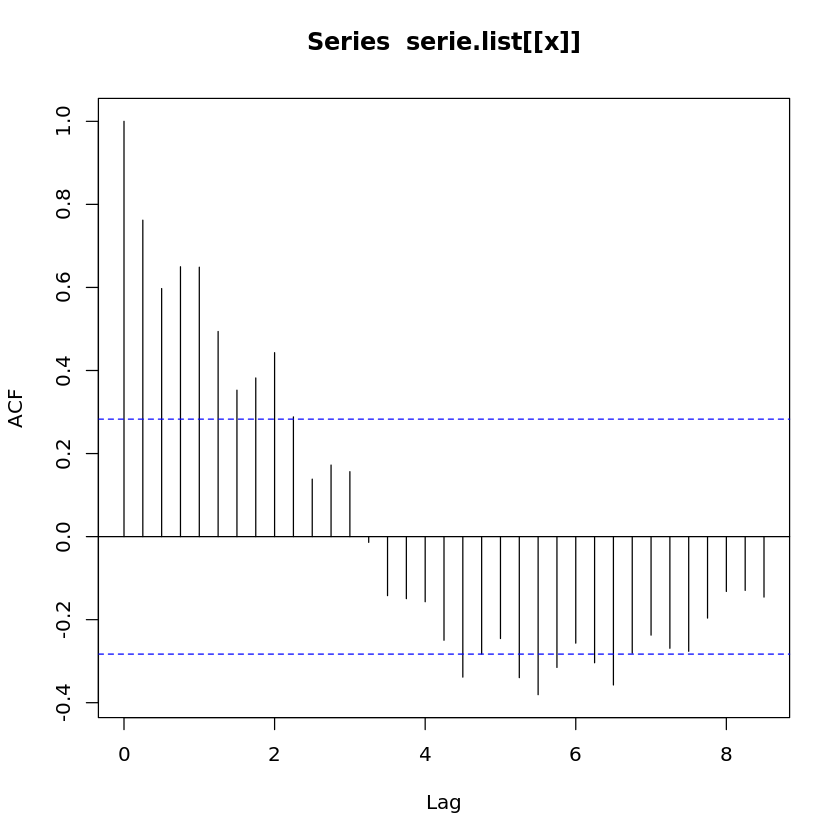

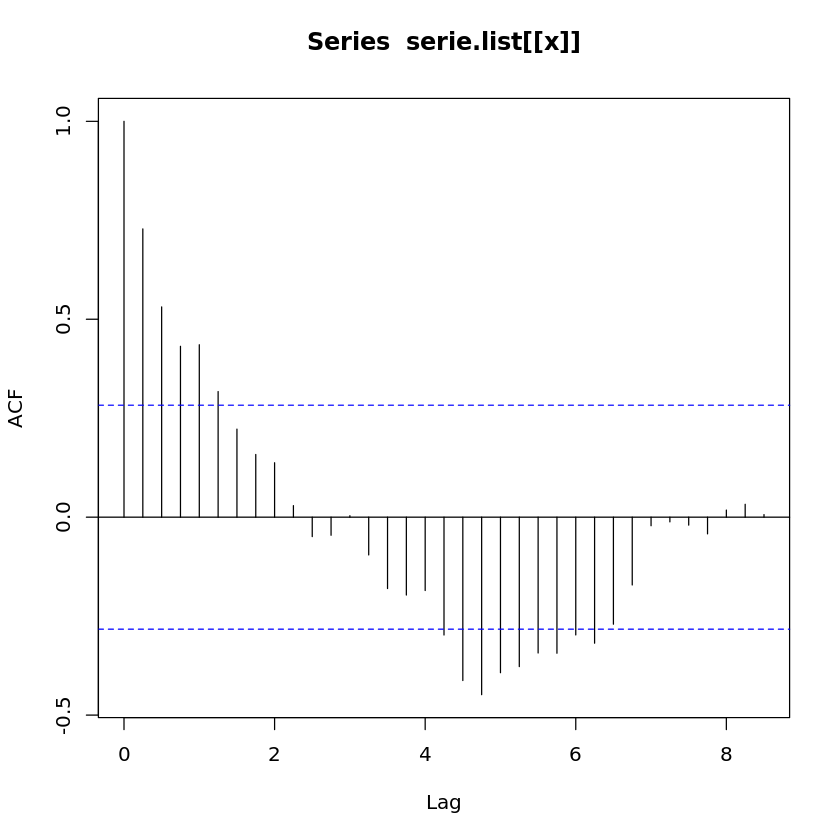

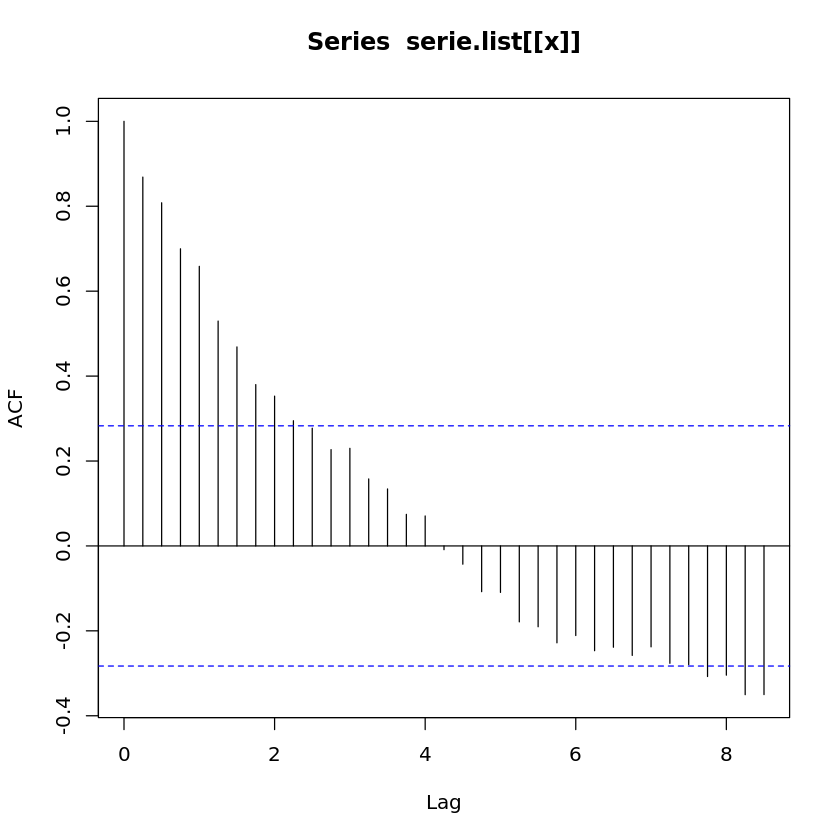

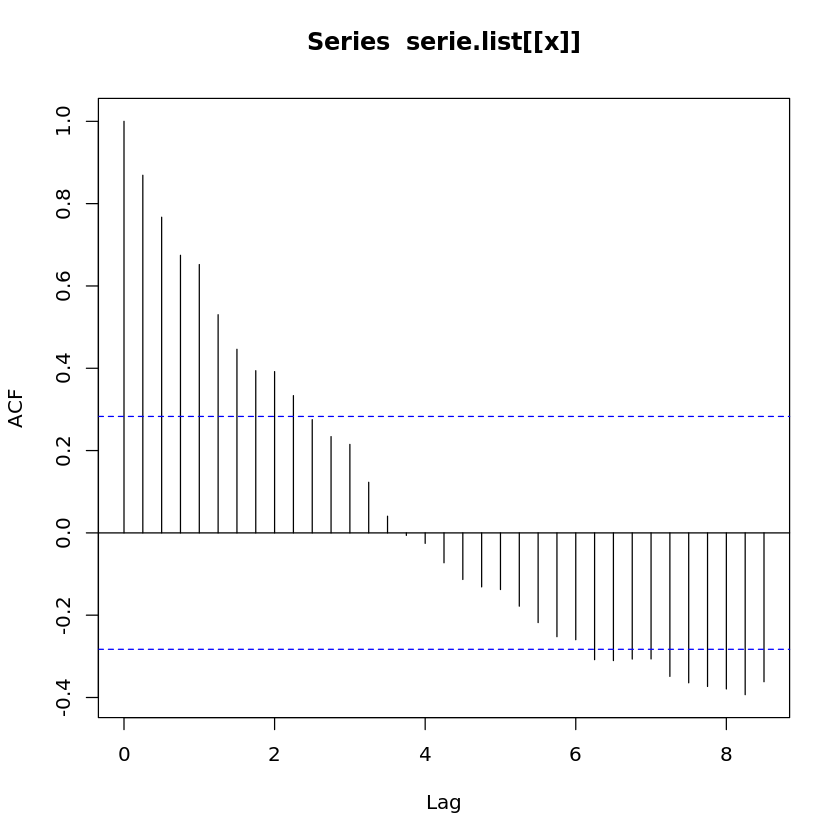

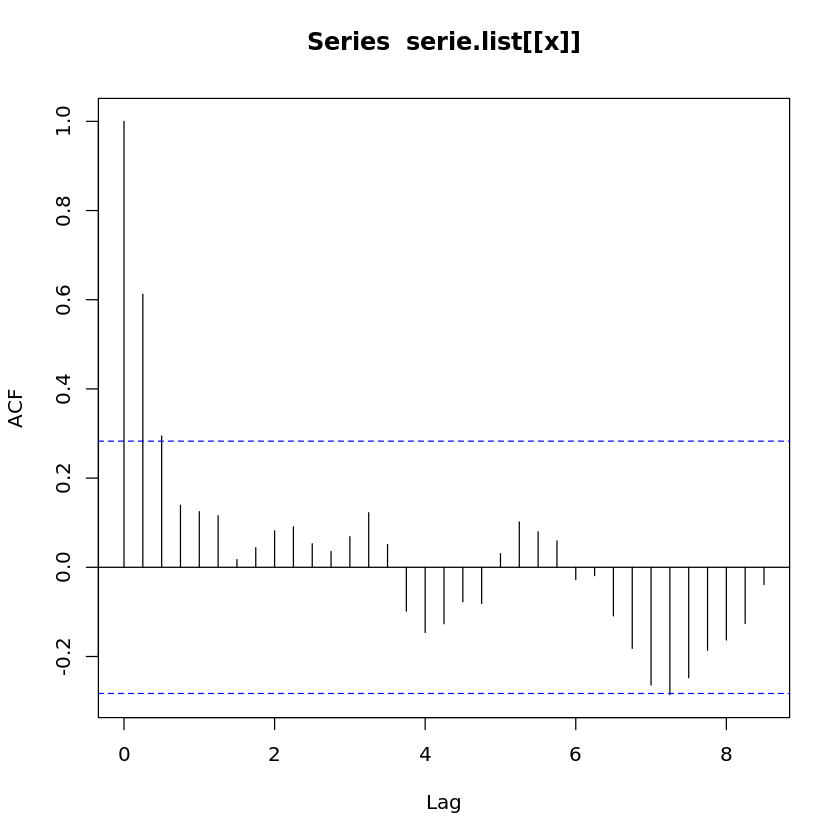

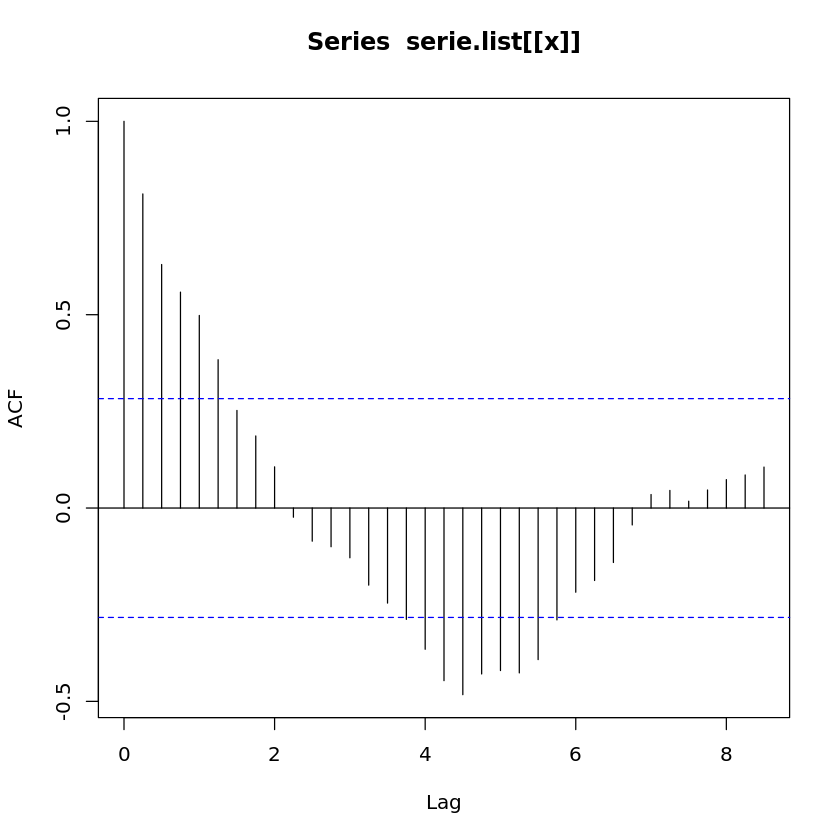

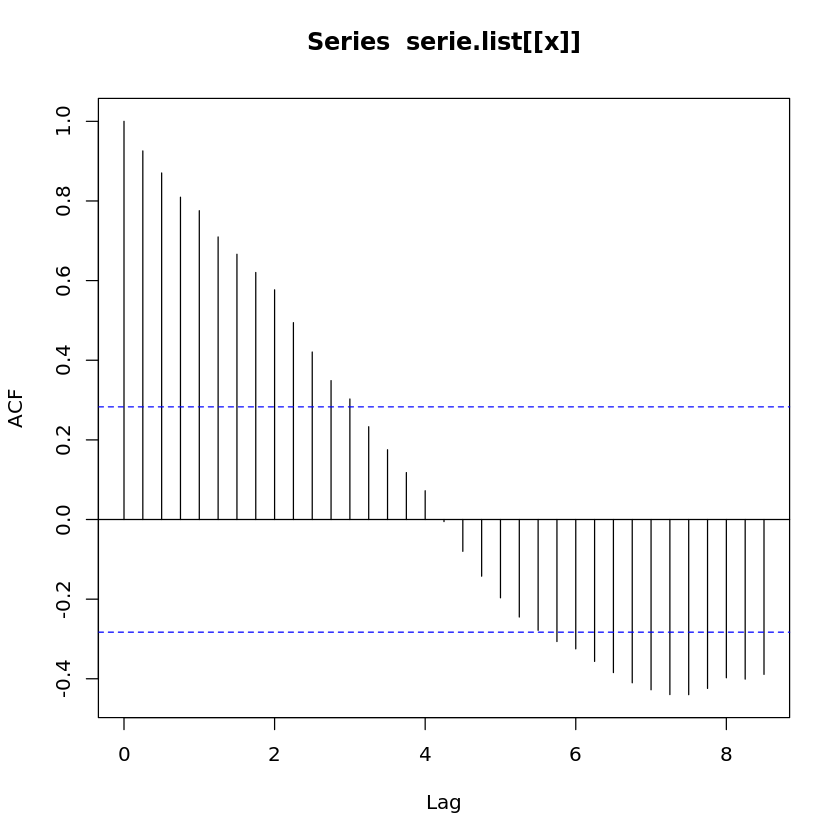

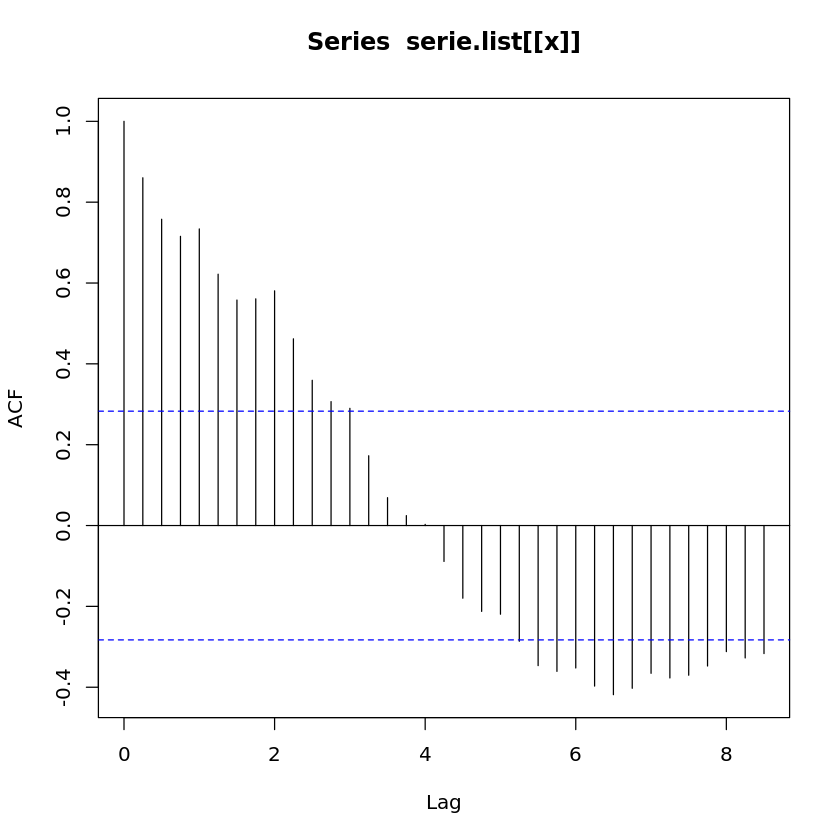

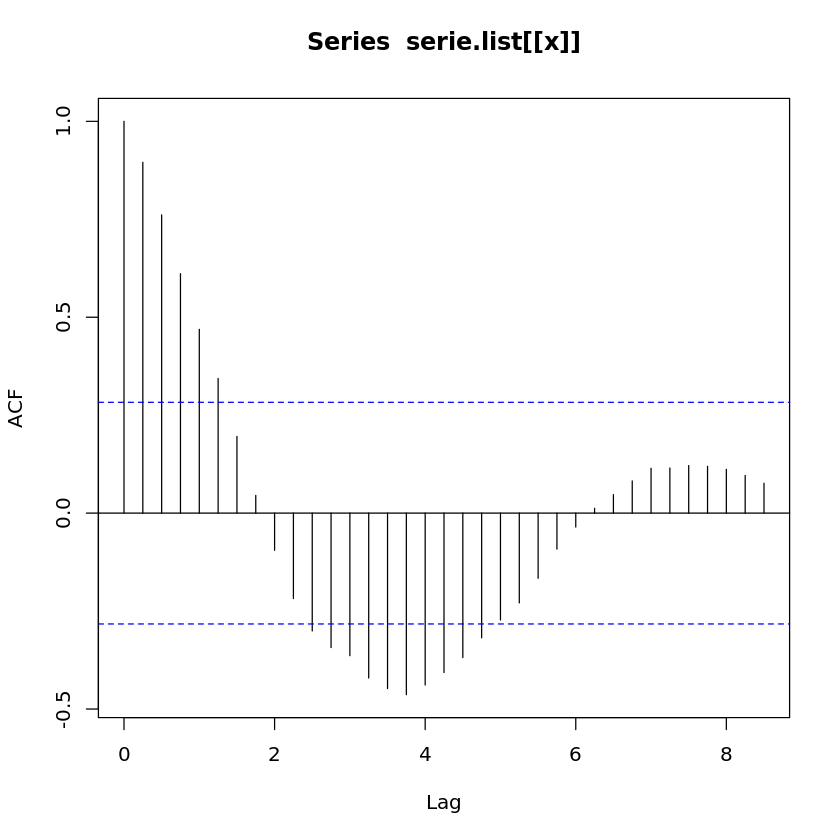

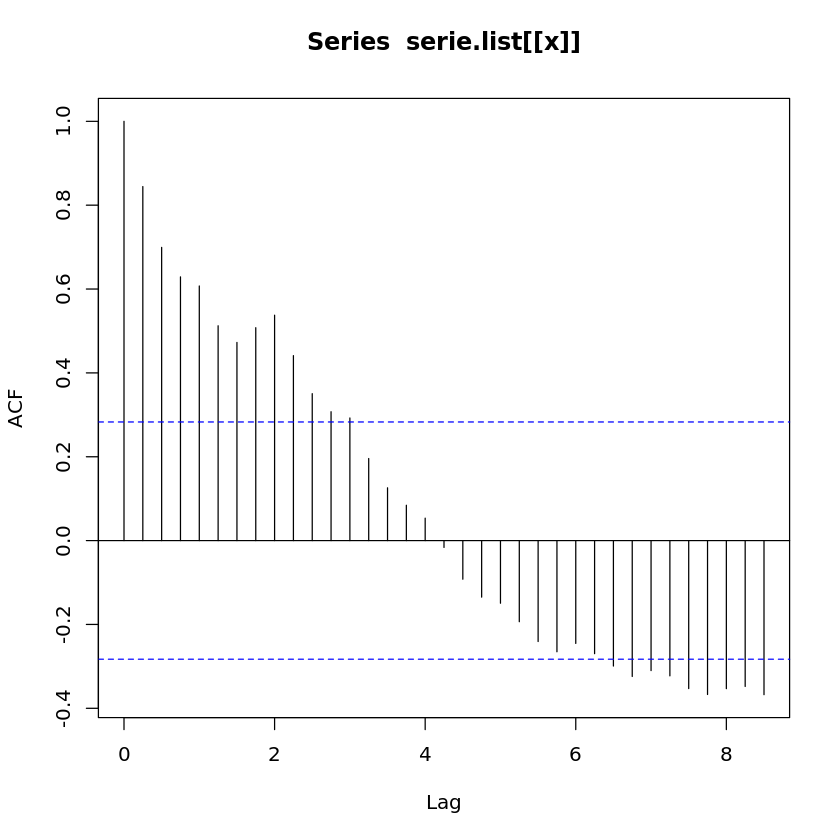

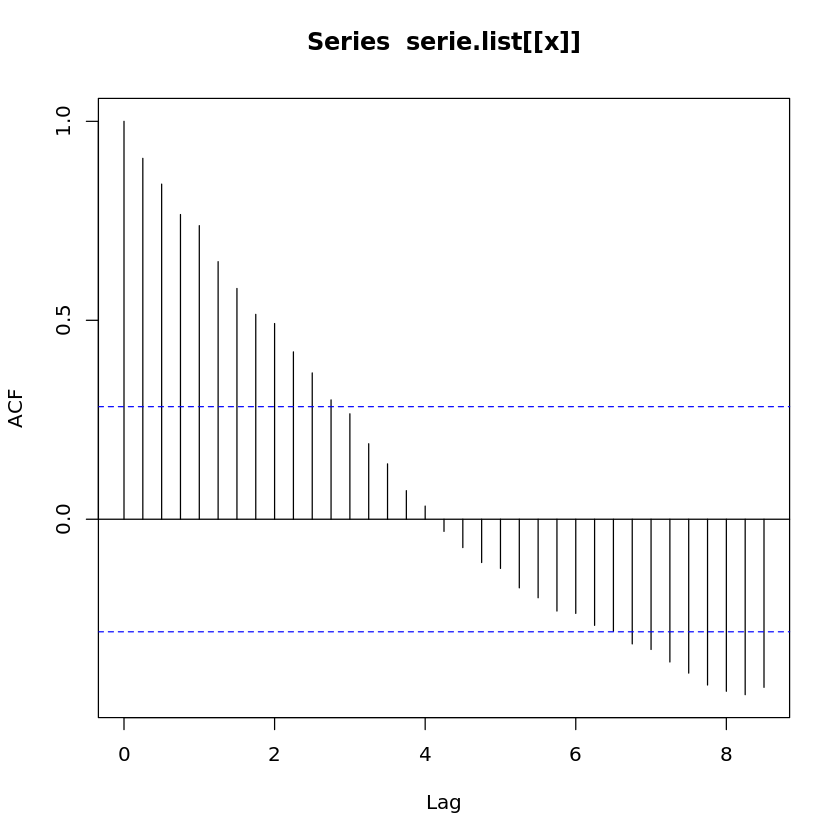

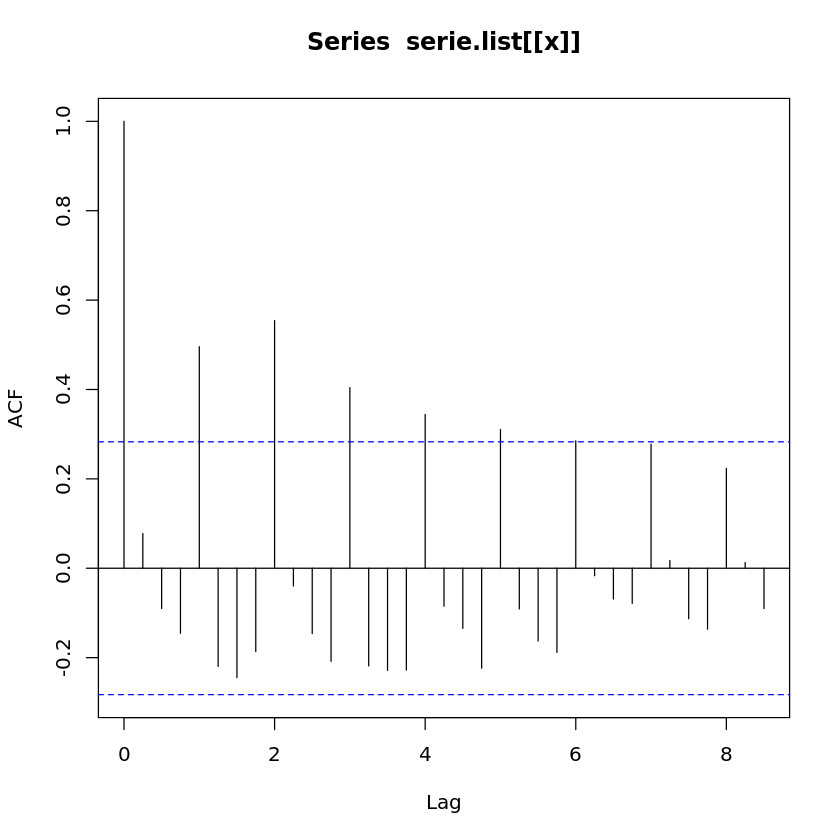

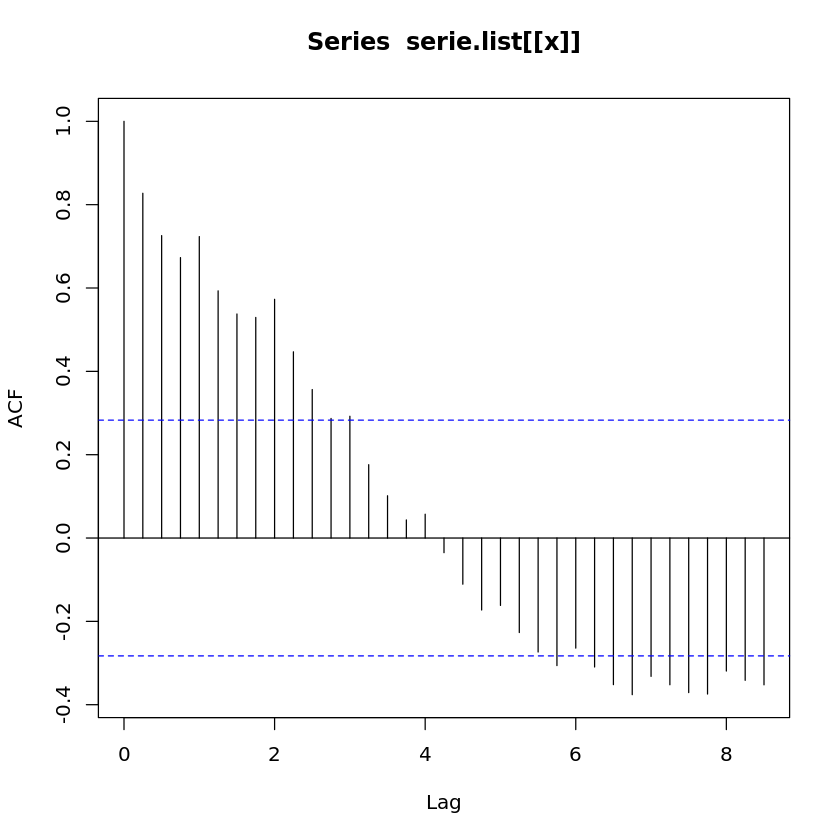

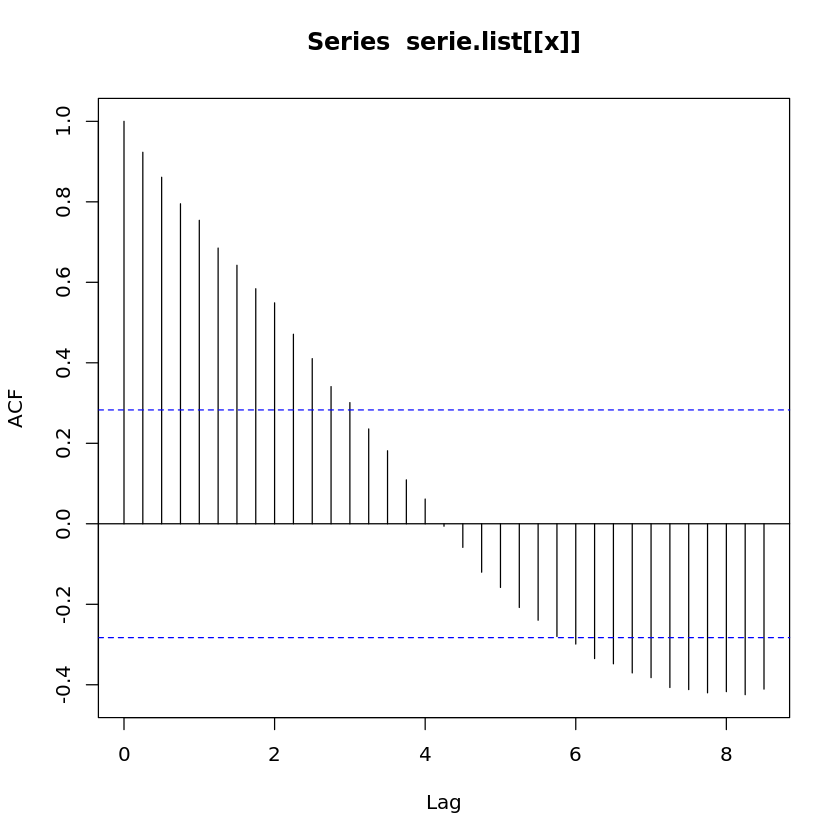

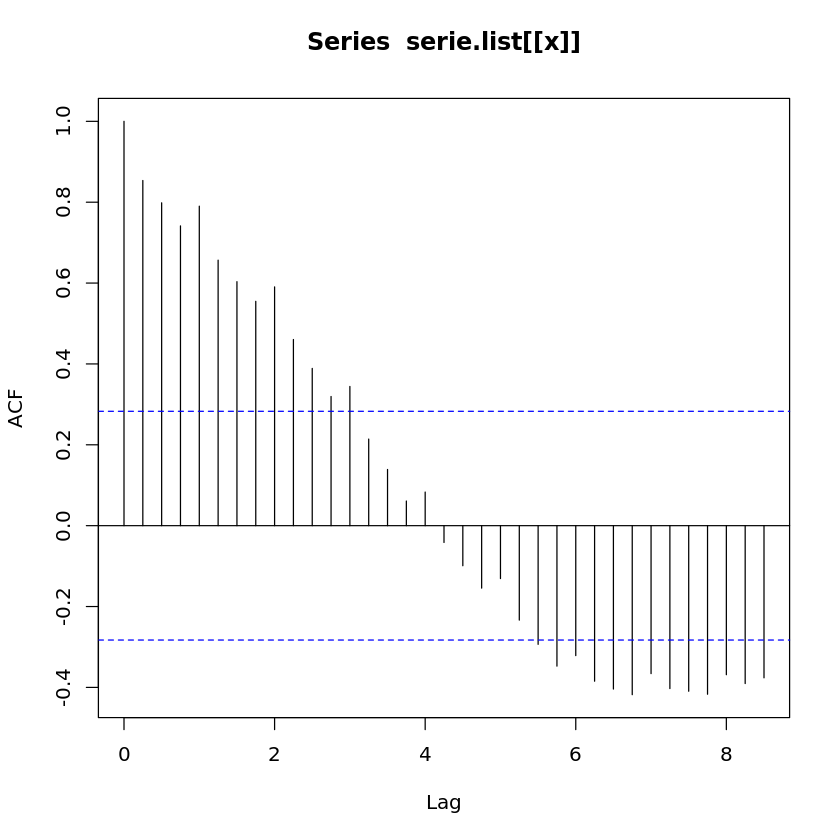

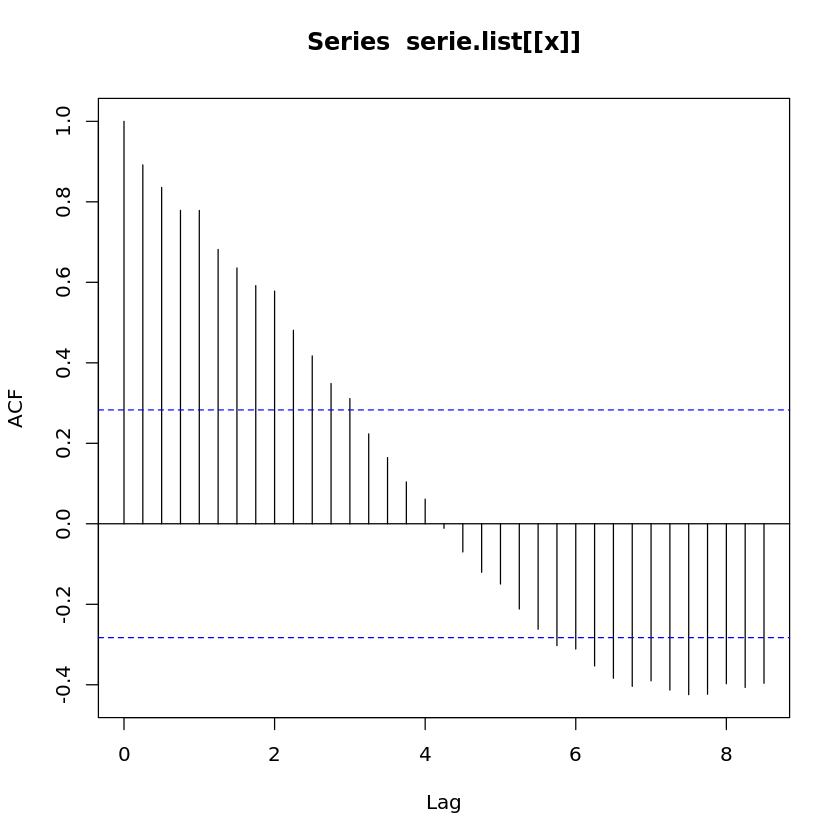

In [15]:
for (x in 1:length(serie.list)){
    acf(serie.list[[x]],lag.max=34) 
}

ERROR: Error in stl(serie1): only univariate series are allowed


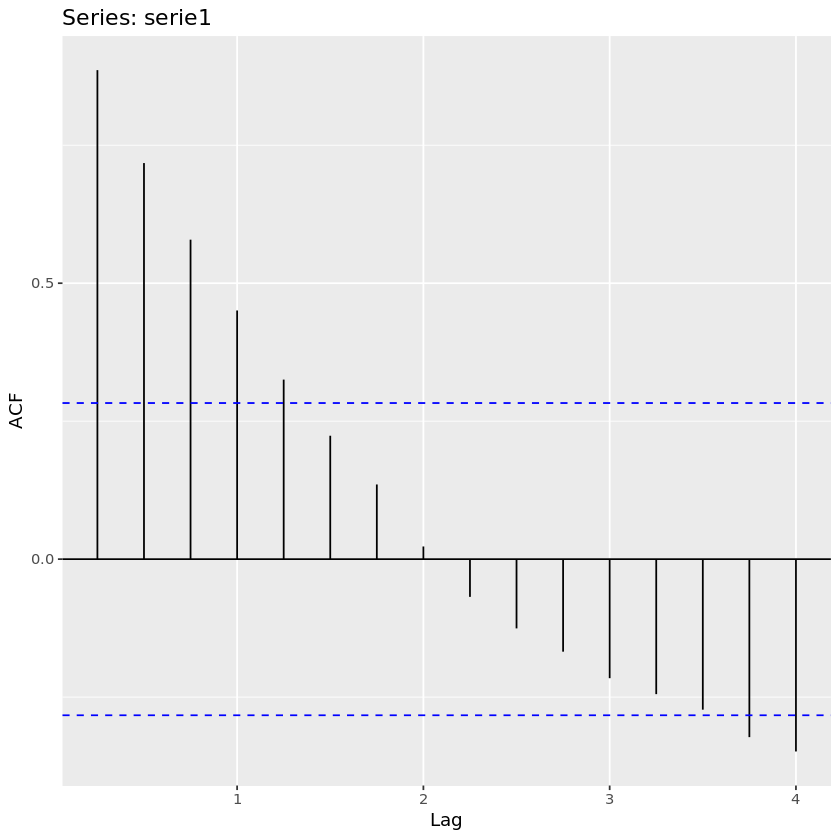

In [8]:
autoplot(acf(serie1, plot = FALSE))


#par(mfrow=c(1,1)) -> Create a multi-paneled plotting window.
autoplot(stl(serie1))
ndiffs(serie1) 
nsdiffs(serie1)
 

# Graficamos el ACF para la serie de tiempo para ver si puede haber una tendencia o una media no constante para cada serie de tiempo
ACF es la estimación de la función de correlación y correlación automática y cruzada
La función acf calcula (y, por defecto, los gráficos) estimaciones de la función de autocovarianza o autocorrelación. La función pacf es la función utilizada para las autocorrelaciones parciales. La función ccf calcula la correlación cruzada o la covarianza cruzada de dos series univariadas.

# Usamos las pruebas de root test, KPSS y Dickey Fuller aumentada, para ver si la prueba sugiere si hay una media constante o no.

#### KPSS es la prueba determina si una serie de tiempo es estacionaria alrededor de una tendencia media o lineal, o no es estacionaria debido a una raíz unitaria. Una serie temporal estacionaria es aquella en la que las propiedades estadísticas, como la media y la varianza, son constantes a lo largo del tiempo.
* La hipótesis nula para la prueba es que los datos son estacionarios. 
* La hipótesis alternativa para la prueba es que los datos no son estacionarios.

##### La prueba de Dickey Fuller aumentada (ADF) es una prueba de raíz unitaria para determinar la estacionariedad. Las raíces unitarias pueden causar resultados impredecibles en el análisis de series de tiempo. La prueba se puede utilizar con la correlación en serie.  Las hipótesis para la prueba:
* La hipótesis nula para esta prueba es que hay una raíz unitaria.
* La hipótesis alternativa varía ligeramente según la ecuación que estés usando. La alternativa básica es que la serie de tiempo es estacionaria (o de tendencia estacionaria).

Si los pasos de KPSS y Dickey Fuller aumentadosindican que hay una media no constante, entonces use la diferenciación para crear una nueva variable

In [20]:
kpss.test(serie1) #both give same result that data is non-stationary

ERROR: Error in kpss.test(serie1): could not find function "kpss.test"


In [6]:
adf.test(serie1)


	Augmented Dickey-Fuller Test

data:  serie1
Dickey-Fuller = -2.1035, Lag order = 3, p-value = 0.5328
alternative hypothesis: stationary


In [16]:
for (x in 1:length(serie.list)){
    kpss.test(serie.list[[x]])
    adf.test(serie.list[[x]])
}

ERROR: Error in kpss.test(serie.list[[x]]): could not find function "kpss.test"


ndiffs()
* Número de diferencias requeridas para una serie estacionaria -> "Stationary Series"
* Funcion para estimar el número de diferencias requeridas para hacer que una determinada serie de tiempo sea estacionaria. ndiffs estima el número de primeras diferencias necesarias.

nsdiffs()
* Número de diferencias requeridas para una serie estacionaria estacional -> "Seasonally Stationary Series"
* Funcion para estimar el número de diferencias requeridas para hacer que una determinada serie de tiempo sea estacionaria. nsdiffs estima el número de diferencias estacionales necesarias.

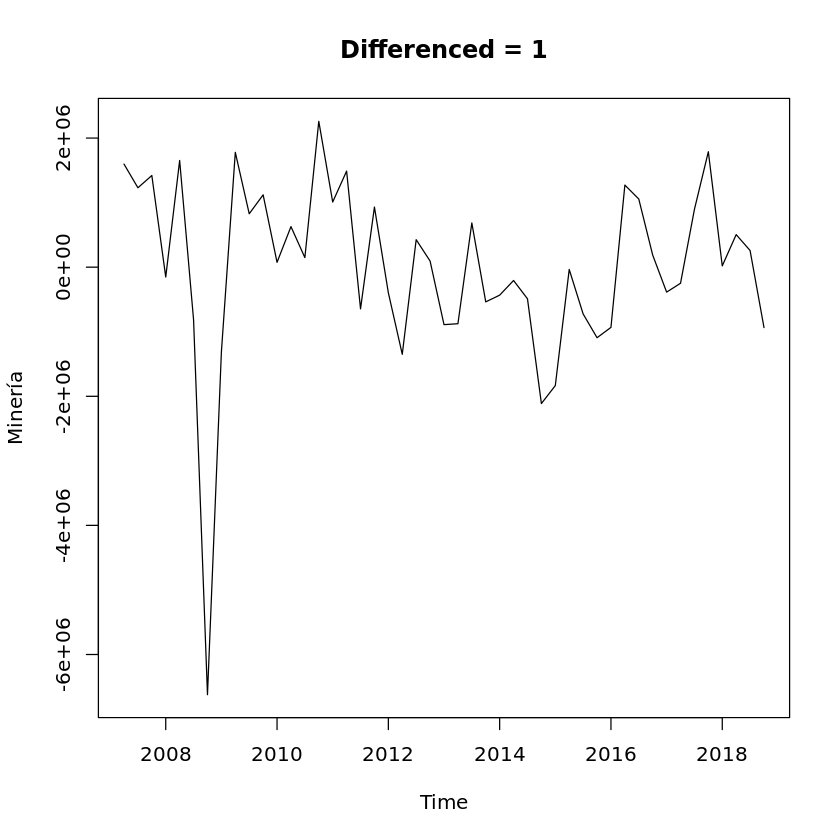

In [7]:
nonSeas = ndiffs(serie1) #R says 1 which is greater than 0
#Primera parte
Proddiff <- diff(serie1)
plot.ts(Proddiff, main="Differenced = 1")


### Modelado de arima
ARIMA es la abreviatura de Media Móvil Integrada AutoRegressive. Los términos de regresión automática (AR) se refieren a los retrasos de las series diferenciadas, los términos de media móvil (MA) se refieren a los retrasos de los errores y I es la cantidad de diferencia utilizada para hacer que las series de tiempo sean estacionarias.


In [39]:
archTest(serie1, lag=10)

ERROR: Error in archTest(serie1, lag = 10): could not find function "archTest"


In [10]:
fit <- auto.arima(serie1)
fit

Series: serie1 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.4326
s.e.  0.1459

sigma^2 estimated as 1.77e+12:  log likelihood=-729.03
AIC=1462.07   AICc=1462.34   BIC=1465.77